In [15]:
import os
import pandas as pd
import seaborn as sns

import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Mask for United Airlines

In [166]:
flights = wrangle.pull_airline_data('UA')

In [167]:
flights.dtypes

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
row_sums               float64
dtype: object

In [112]:

flights.OP_CARRIER.value_counts()

UA    752467
Name: OP_CARRIER, dtype: int64

In [113]:
flights

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
1,2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2,2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
3,2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
4,2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...
752462,2019-12-31,UA,299,DEN,ANC,9.0,0.0,21.0,0.0,0.0,30.0
752463,2019-12-31,UA,288,PHX,EWR,8.0,0.0,0.0,0.0,96.0,104.0
752464,2019-12-31,UA,282,EWR,DEN,31.0,0.0,0.0,0.0,0.0,31.0
752465,2019-12-31,UA,260,SEA,IAD,0.0,0.0,0.0,0.0,43.0,43.0


In [114]:
df = wrangle.clean_flight_data_for_average_daily_delay(flights)

/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:103: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_monthly_mean = flights.resample('M').mean().total_delays
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:109: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_daily_mean = pd.DataFrame(flights.resample('D').mean().total_delays)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:124: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future versi

In [115]:
col_to_sum = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']


In [116]:
top_15_hubs = ['ATL',
'DFW',
'DEN',
'ORD',
'LAX',
'JFK',
'IAH',
'PHX',
'EWR',
'SFO',
'SEA',
'IAD',
'PHL',
'CLT',
'MIA']

In [117]:
flights.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
1,2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2,2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
3,2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
4,2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0


 ### Data Types, Shape

In [118]:
flights.shape

(752467, 11)

In [119]:
# seeing all my data types
flights.dtypes


FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAFT_DELAY           float64
row_sums                      float64
dtype: object

In [120]:
# shows the categories for all the columns 
for col in df:
    print(df[col].value_counts())

101.509765    31
82.924974     31
52.500000      4
44.000000      3
55.142857      3
              ..
66.034483      1
56.785714      1
43.477876      1
56.414414      1
41.576271      1
Name: average_delay, Length: 3902, dtype: int64


In [121]:
df.head()

,average_delay
FL_DATE,
2009-01-01,51.248000
2009-01-02,68.795031
2009-01-03,52.456376
2009-01-04,43.675676
2009-01-05,46.297872


## Statistical Summary

In [122]:
flights.describe()

,OP_CARRIER_FL_NUM,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
count,752467.000000,752467.000000,752467.000000,752467.000000,752467.000000,752467.000000,752467.000000
mean,976.295952,17.939793,2.903923,16.424048,0.026400,25.413740,62.707903
std,598.554216,40.116505,21.757668,31.474606,1.575385,49.456025,65.314445
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,472.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
50%,810.000000,4.000000,0.000000,3.000000,0.000000,0.000000,41.000000
75%,1498.000000,20.000000,0.000000,21.000000,0.000000,32.000000,77.000000
max,2833.000000,1405.000000,1239.000000,1041.000000,349.000000,1365.000000,1539.000000


In [123]:
list_of_airports = flights['ORIGIN'].value_counts()
list_of_airports = pd.DataFrame(list_of_airports)
list_of_airports.nunique()

ORIGIN    15
dtype: int64

In [124]:
list_of_airports.head(15)

,ORIGIN
ORD,169283
SFO,111971
DEN,109842
EWR,99459
IAH,96804
LAX,54801
IAD,48113
SEA,17170
PHX,9631
PHL,8546


In [125]:
list_of_airports.index.tolist()

['ORD',
 'SFO',
 'DEN',
 'EWR',
 'IAH',
 'LAX',
 'IAD',
 'SEA',
 'PHX',
 'PHL',
 'DFW',
 'MIA',
 'ATL',
 'JFK',
 'CLT']

## Spitting the data

In [126]:
# Split the data
train = df.loc[:'2016'] 
test = df.loc['2016':] 


In [127]:
train

,average_delay
FL_DATE,
2009-01-01,51.248000
2009-01-02,68.795031
2009-01-03,52.456376
2009-01-04,43.675676
2009-01-05,46.297872
...,...
2016-12-27,53.531915
2016-12-28,51.117347
2016-12-29,51.971429


In [128]:
flights.set_index('FL_DATE')

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...
2019-12-31,UA,299,DEN,ANC,9.0,0.0,21.0,0.0,0.0,30.0
2019-12-31,UA,288,PHX,EWR,8.0,0.0,0.0,0.0,96.0,104.0
2019-12-31,UA,282,EWR,DEN,31.0,0.0,0.0,0.0,0.0,31.0


In [129]:
# Split the data
train_fl = flights.set_index('FL_DATE').loc[:'2016'] 
test_fl = flights.set_index('FL_DATE').loc['2016':] 
train_fl.loc['2009-09-30':]

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-09-30,UA,26,LAX,JFK,44.0,0.0,0.0,0.0,0.0,44.0
2009-09-30,UA,33,DEN,SNA,0.0,0.0,3.0,0.0,46.0,49.0
2009-09-30,UA,73,SFO,HNL,25.0,0.0,1.0,0.0,0.0,26.0
2009-09-30,UA,81,LAX,HNL,0.0,0.0,0.0,0.0,328.0,328.0
2009-09-30,UA,100,SFO,IAD,19.0,0.0,0.0,0.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,UA,726,SFO,EWR,0.0,0.0,18.0,0.0,0.0,18.0
2016-12-31,UA,769,ORD,SFO,56.0,0.0,0.0,0.0,0.0,56.0
2016-12-31,UA,775,ORD,DEN,10.0,0.0,9.0,0.0,0.0,19.0


In [130]:
train_fl

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,UA,726,SFO,EWR,0.0,0.0,18.0,0.0,0.0,18.0
2016-12-31,UA,769,ORD,SFO,56.0,0.0,0.0,0.0,0.0,56.0
2016-12-31,UA,775,ORD,DEN,10.0,0.0,9.0,0.0,0.0,19.0


In [131]:
train_fl.tail(50)

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2016-12-31,UA,140,ORD,IAH,0.0,0.0,18.0,0.0,0.0,18.0
2016-12-31,UA,223,SFO,DEN,24.0,0.0,0.0,0.0,0.0,24.0
2016-12-31,UA,235,PHX,IAH,0.0,0.0,0.0,0.0,20.0,20.0
2016-12-31,UA,253,IAH,HNL,13.0,0.0,6.0,0.0,0.0,19.0
2016-12-31,UA,256,SFO,LAX,19.0,0.0,6.0,0.0,0.0,25.0
2016-12-31,UA,260,SEA,IAD,0.0,17.0,0.0,0.0,18.0,35.0
2016-12-31,UA,262,SEA,IAD,9.0,0.0,0.0,0.0,30.0,39.0
2016-12-31,UA,263,DEN,ORD,33.0,0.0,0.0,0.0,0.0,33.0
2016-12-31,UA,264,DEN,PHL,13.0,0.0,0.0,0.0,26.0,39.0


In [132]:
train_fl.dtypes

OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
row_sums               float64
dtype: object

In [133]:
train_fl.dtypes

OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
row_sums               float64
dtype: object

## Sum of Delay Grouped by Date

In [134]:
# Sum the delays grouped by dates
train_fl.groupby('FL_DATE')[col_to_sum].sum()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,2341.0,109.0,875.0,0.0,3081.0
2009-01-02,2964.0,24.0,3170.0,0.0,4918.0
2009-01-03,2461.0,115.0,1582.0,0.0,3658.0
2009-01-04,1561.0,386.0,731.0,0.0,2170.0
2009-01-05,1692.0,223.0,1259.0,0.0,3354.0
...,...,...,...,...,...
2016-12-27,4626.0,0.0,1989.0,0.0,5965.0
2016-12-28,3123.0,14.0,1963.0,0.0,4919.0
2016-12-29,3340.0,24.0,2364.0,0.0,5186.0


In [26]:
pd.DataFrame(train_fl.groupby('FL_DATE')['row_sums'].sum())

,row_sums
FL_DATE,
2009-01-01,6406.0
2009-01-02,11076.0
2009-01-03,7816.0
2009-01-04,4848.0
2009-01-05,6528.0
...,...
2016-12-27,12580.0
2016-12-28,10019.0
2016-12-29,10914.0


## Max Sum values grouped by Date

In [27]:
# Max values of Sum the delays grouped by dates
train_fl.groupby('FL_DATE')[col_to_sum].sum().max()

CARRIER_DELAY          33733.0
WEATHER_DELAY          20679.0
NAS_DELAY              19702.0
SECURITY_DELAY          3149.0
LATE_AIRCRAFT_DELAY    46200.0
dtype: float64

## Mean values grouped by Mean

In [28]:
# Mean values grouped by Date
mean_group = train_fl.groupby('FL_DATE')[col_to_sum].mean()
mean_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,18.728000,0.872000,7.000000,0.0,24.648000
2009-01-02,18.409938,0.149068,19.689441,0.0,30.546584
2009-01-03,16.516779,0.771812,10.617450,0.0,24.550336
2009-01-04,14.063063,3.477477,6.585586,0.0,19.549550
2009-01-05,12.000000,1.581560,8.929078,0.0,23.787234
...,...,...,...,...,...
2016-12-27,19.685106,0.000000,8.463830,0.0,25.382979
2016-12-28,15.933673,0.071429,10.015306,0.0,25.096939
2016-12-29,15.904762,0.114286,11.257143,0.0,24.695238


In [29]:
mean_row_grp = pd.DataFrame(train_fl.groupby('FL_DATE')['row_sums'].mean())
mean_row_grp

,row_sums
FL_DATE,
2009-01-01,51.248000
2009-01-02,68.795031
2009-01-03,52.456376
2009-01-04,43.675676
2009-01-05,46.297872
...,...
2016-12-27,53.531915
2016-12-28,51.117347
2016-12-29,51.971429


# Monthly Averages by Month

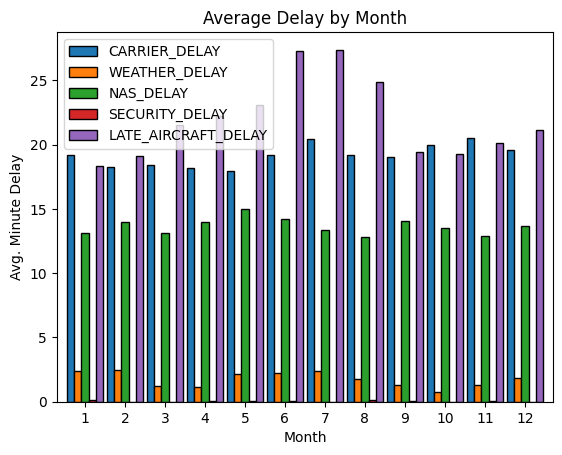

In [30]:
ax = mean_group.groupby(mean_group.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

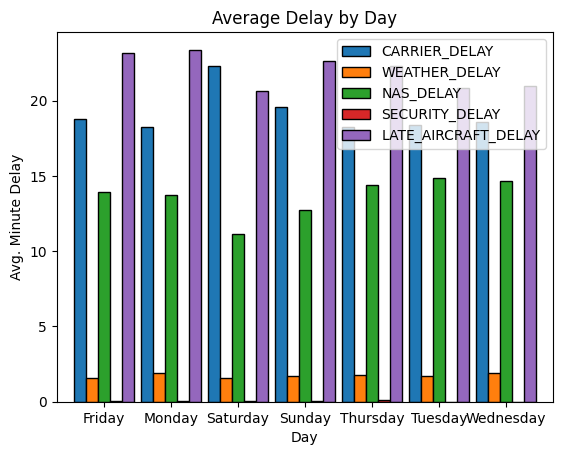

In [31]:
ax = mean_group.groupby(mean_group.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Day', xlabel='Day', ylabel='Avg. Minute Delay')
plt.show()

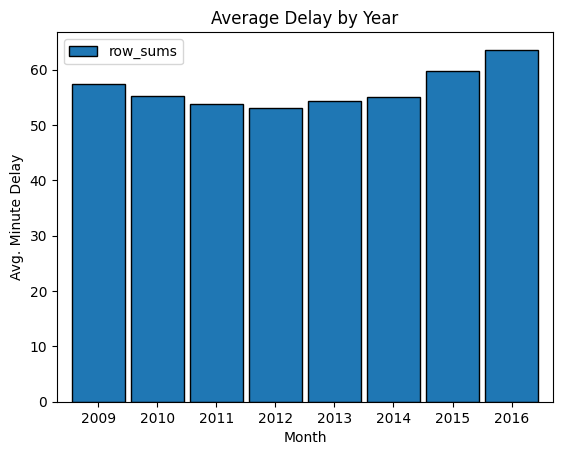

In [32]:
ax = mean_row_grp.groupby(mean_group.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Year', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

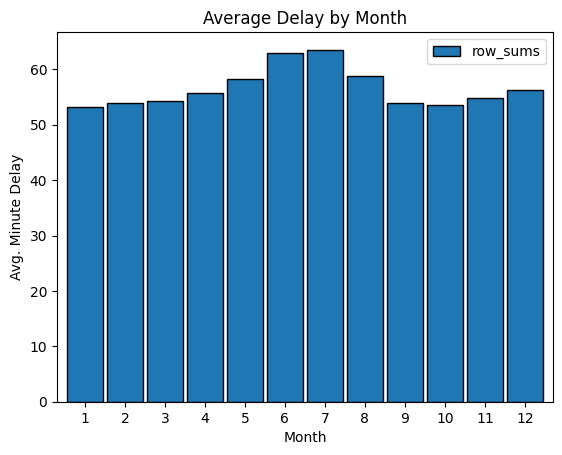

In [33]:
ax = mean_row_grp.groupby(mean_group.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

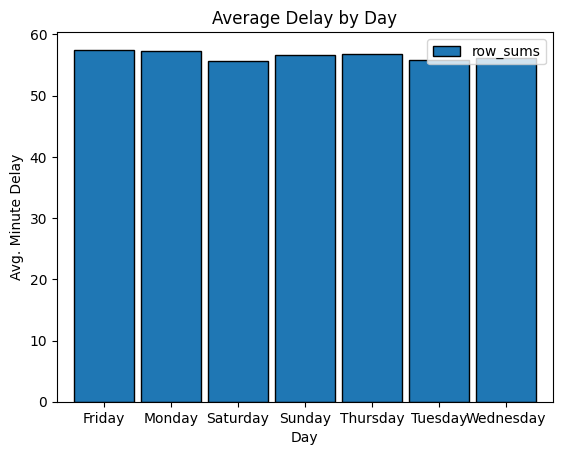

In [34]:
ax = mean_row_grp.groupby(mean_group.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Day', xlabel='Day', ylabel='Avg. Minute Delay')
plt.show()

### Maximim Delay per Delay type

In [35]:
# Max mean value grouped by Date
train_fl.groupby('FL_DATE')[col_to_sum].mean().max()

CARRIER_DELAY          88.151786
WEATHER_DELAY          52.325581
NAS_DELAY              54.259259
SECURITY_DELAY         25.071429
LATE_AIRCRAFT_DELAY    68.973585
dtype: float64

## Sum values grouped by Origin

In [36]:
flights.groupby('ORIGIN')[col_to_sum].sum()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,72298.0,13251.0,193845.0,19.0,163123.0
CLT,30805.0,3385.0,39279.0,0.0,36473.0
DEN,1695481.0,333454.0,1770002.0,1054.0,2765183.0
DFW,132900.0,29603.0,217858.0,171.0,248538.0
EWR,1914576.0,366547.0,1625823.0,5357.0,2688786.0
IAD,925243.0,236819.0,945105.0,3050.0,1011597.0
IAH,1749253.0,404286.0,1594368.0,604.0,2130958.0
JFK,67915.0,15862.0,143905.0,744.0,77278.0
LAX,1022315.0,21204.0,914685.0,6507.0,1328374.0


In [37]:
pd.DataFrame(flights.groupby('ORIGIN')['row_sums'].sum())

,row_sums
ORIGIN,
ATL,442536.0
CLT,109942.0
DEN,6565174.0
DFW,629070.0
EWR,6601089.0
IAD,3121814.0
IAH,5879469.0
JFK,305704.0
LAX,3293085.0


## Mean values grouped by Origin

In [38]:
origin_group = train_fl.groupby('ORIGIN')[col_to_sum].mean()
origin_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,13.624905,1.946631,24.189629,0.007192,27.914459
CLT,15.568726,1.996217,24.968474,0.000000,24.321564
DEN,16.279442,2.359371,14.144681,0.013644,24.681373
DFW,15.722548,2.898891,24.118504,0.037182,27.552077
EWR,20.917588,3.237338,15.176184,0.090598,21.267192
IAD,20.515620,3.750309,18.052134,0.084150,19.613077
IAH,20.007321,2.709143,14.676950,0.009079,20.612564
JFK,12.965827,3.028255,27.473272,0.142039,14.753341
LAX,19.480370,0.339650,15.898375,0.152790,22.920471


In [39]:
origin_row_grp = pd.DataFrame(train_fl.groupby('ORIGIN')['row_sums'].mean())
origin_row_grp = origin_row_grp.sort_values(by='row_sums', ascending=False)
origin_row_grp

,row_sums
ORIGIN,
DFW,70.329202
ATL,67.682816
PHL,66.880983
CLT,66.854981
ORD,62.386592
IAD,62.015290
MIA,61.508995
PHX,61.375233
SEA,60.695904


In [44]:
origin_row_grp.index.tolist()

['DFW',
 'ATL',
 'PHL',
 'CLT',
 'ORD',
 'IAD',
 'MIA',
 'PHX',
 'SEA',
 'EWR',
 'LAX',
 'JFK',
 'IAH',
 'DEN',
 'SFO']

In [42]:
origin_group.sort_values(by='LATE_AIRCRAFT_DELAY', ascending=False)


,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,13.624905,1.946631,24.189629,0.007192,27.914459
DFW,15.722548,2.898891,24.118504,0.037182,27.552077
PHL,16.532488,2.612044,20.799683,0.044849,26.891918
SFO,20.435888,0.451184,10.282178,0.005739,26.188132
ORD,18.992119,3.408462,14.494696,0.005355,25.485961
PHX,15.037446,0.759633,20.509944,0.000932,25.067278
MIA,16.509305,1.451303,18.847084,0.003102,24.698201
DEN,16.279442,2.359371,14.144681,0.013644,24.681373
CLT,15.568726,1.996217,24.968474,0.000000,24.321564


In [43]:
origin_row_grp.row_sums

ORIGIN
DFW    70.329202
ATL    67.682816
PHL    66.880983
CLT    66.854981
ORD    62.386592
IAD    62.015290
MIA    61.508995
PHX    61.375233
SEA    60.695904
EWR    60.688900
LAX    58.791655
JFK    58.362734
IAH    58.015058
DEN    57.478512
SFO    57.363121
Name: row_sums, dtype: float64

In [158]:
[pos for pos in list(range(len(origin_row_grp)))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [172]:
[ht for ht in origin_row_grp.row_sums]

[70.32920200043488,
 67.68281604844815,
 66.88098256735341,
 66.85498108448928,
 62.386591814196315,
 62.01528955309671,
 61.50899503722084,
 61.375233064014914,
 60.695904013239556,
 60.68889998573263,
 58.79165492627031,
 58.36273386788851,
 58.015057544757035,
 57.47851218561385,
 57.36312077857036]

In [202]:
sorted_list = ['DFW', 'ATL', 'PHL', 'CLT', 'ORD', 'IAD', 'MIA', 'PHX', 'SEA', 'EWR',
       'LAX', 'JFK', 'IAH', 'DEN', 'SFO']
airport_count = pd.DataFrame(train_fl.ORIGIN.value_counts())
airport_count = airport_count.reindex(sorted_list)
airport_count

,ORIGIN
DFW,4599
ATL,2642
PHL,6310
CLT,793
ORD,119524
IAD,34795
MIA,3224
PHX,6436
SEA,12085
EWR,56072


In [279]:
origin_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,13.624905,1.946631,24.189629,0.007192,27.914459
CLT,15.568726,1.996217,24.968474,0.000000,24.321564
DEN,16.279442,2.359371,14.144681,0.013644,24.681373
DFW,15.722548,2.898891,24.118504,0.037182,27.552077
EWR,20.917588,3.237338,15.176184,0.090598,21.267192
IAD,20.515620,3.750309,18.052134,0.084150,19.613077
IAH,20.007321,2.709143,14.676950,0.009079,20.612564
JFK,12.965827,3.028255,27.473272,0.142039,14.753341
LAX,19.480370,0.339650,15.898375,0.152790,22.920471


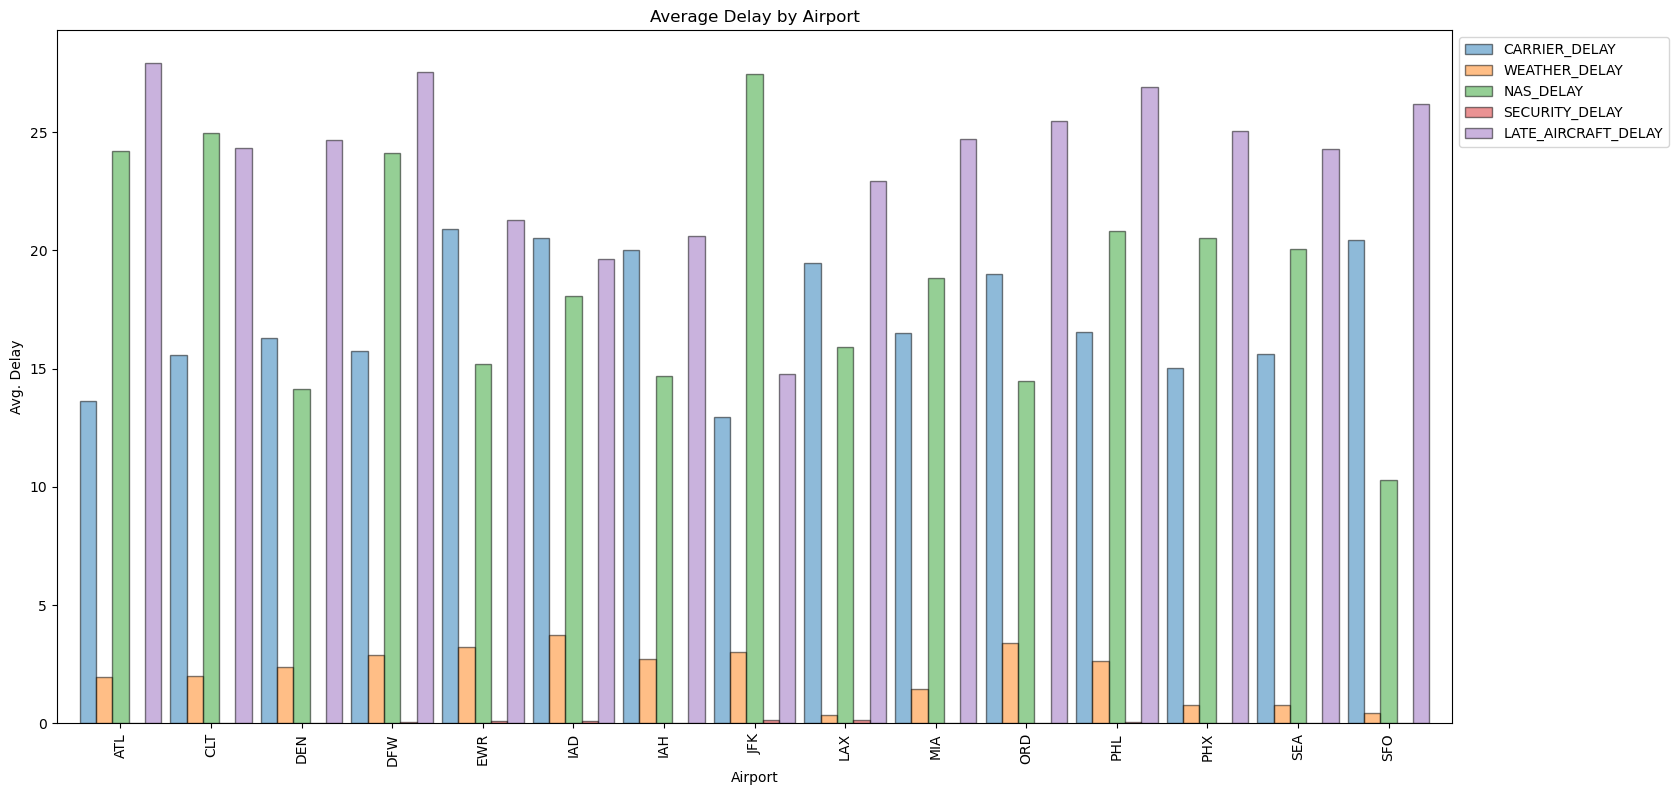

In [288]:
# Create the bar plot
ax = origin_group.plot.bar(width=0.9, ec='black', alpha=.5, figsize=(18, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

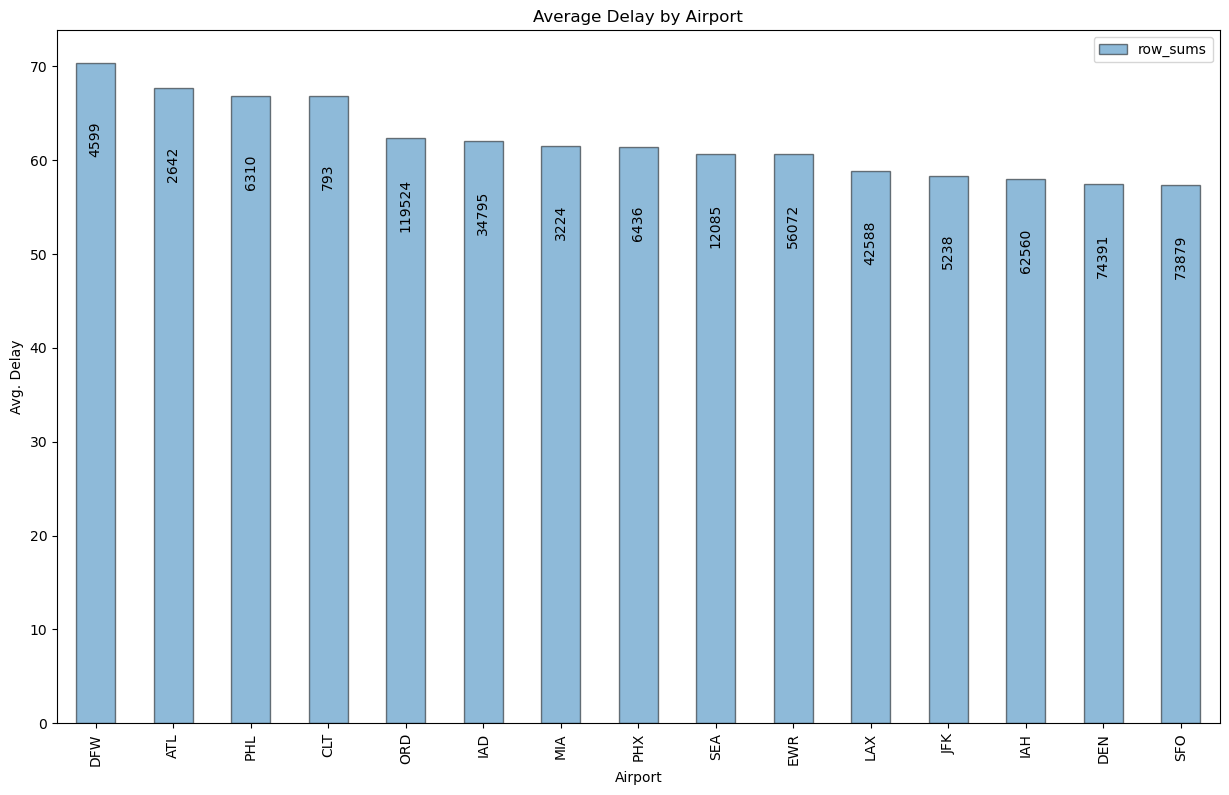

In [287]:
import matplotlib.pyplot as plt

# Create the bar plot
ax = origin_row_grp.plot.bar(width=0.5, ec='black', alpha=.5, figsize=(15, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

# Get the heights and positions for text labels
ht_list = [ht for ht in origin_row_grp.row_sums]
pos_list = list(range(len(origin_row_grp)))
airport_val_list = [val for val in airport_count.ORIGIN]


# Loop through the data and add text labels inside the existing plot
for ht, pos, val in zip(ht_list, pos_list, airport_val_list):
    ax.text(pos, ht-10, val, fontsize=10, ha='center', va='bottom', rotation=90)  # Adjust ha and va as needed

# Show the plot
plt.show()


In [309]:
train.groupby([train.index.year, train.index.month]).mean()

average_delay
FL_DATE FL_DATE               
2009    1            54.424065
        2            54.377881
        3            55.424508
        4            61.722718
        5            57.292045
...                        ...
2016    8            64.503543
        9            59.785288
        10           60.862925
        11           59.518270
        12           60.601044

[96 rows x 1 columns]

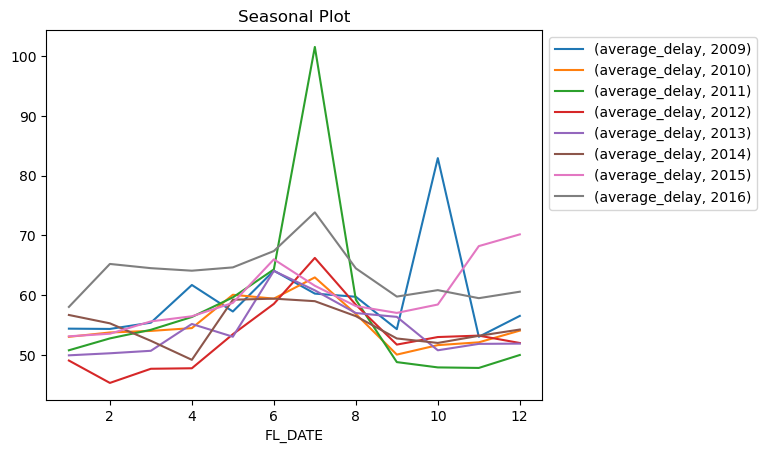

In [319]:
# .unstack turns an index level into columns
train.groupby([train.index.year, train.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

In [290]:
train


,average_delay
FL_DATE,
2009-01-01,51.248000
2009-01-02,68.795031
2009-01-03,52.456376
2009-01-04,43.675676
2009-01-05,46.297872
...,...
2016-12-27,53.531915
2016-12-28,51.117347
2016-12-29,51.971429


<Axes: xlabel='weekday', ylabel='average_delay'>

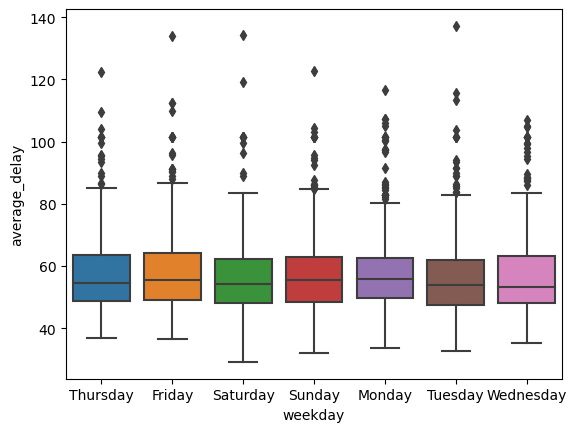

In [291]:
(
    train.reset_index()
    .assign(weekday=lambda train: train.FL_DATE.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='average_delay', x='weekday')
)



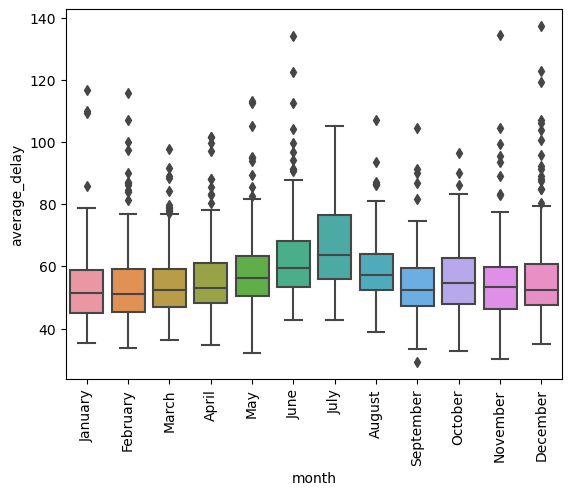

In [304]:
(
    train.reset_index()
    .assign(month=lambda train: train.FL_DATE.dt.month_name())
    .pipe((sns.boxplot, 'data'), y='average_delay', x='month')
)
plt.xticks(rotation=90)
plt.show()

In [317]:
train_fl.groupby([train_fl.index.year, train_fl.index.month])[col_to_sum].mean()

CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
FL_DATE FL_DATE                                                            
2009    1            16.501696       1.569525  14.872335        0.010174   
        2            13.329348       1.151359  17.281793        0.000000   
        3            15.535731       1.131948  15.211350        0.021719   
        4            16.684211       1.695316  17.335104        0.000000   
        5            14.274051       1.947264  16.708517        0.018535   
...                        ...            ...        ...             ...   
2016    8            18.967075       3.161812  14.771236        0.210159   
        9            21.380890       1.949114  15.065775        0.000000   
        10           20.273642       0.547284  16.481388        0.000000   
        11           19.452019       2.143291  15.284846        0.000000   
        12           20.056081       5.452921  14.626732        0.000000   

                 LATE_AIRCRAFT_DELAY  
FL_DATE FL_DATE                       
2009    1                  21.982316  
        2                  24.530978  
        3                  26.102989  
        4                  27.372284  
        5                  25.251324  
...                              ...  
2016    8                  29.201469  
        9                  23.976630  
        10                 25.359155  
        11                 23.938993  
        12                 26.287528  

[94 rows x 5 columns]

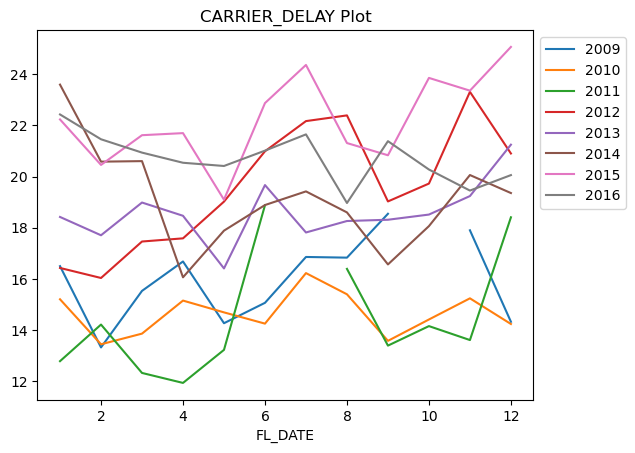

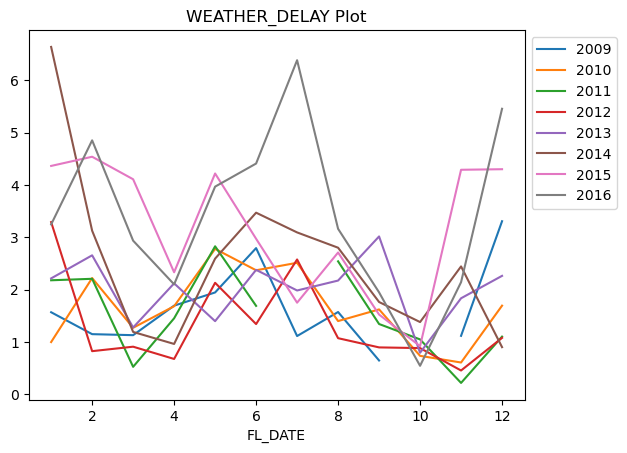

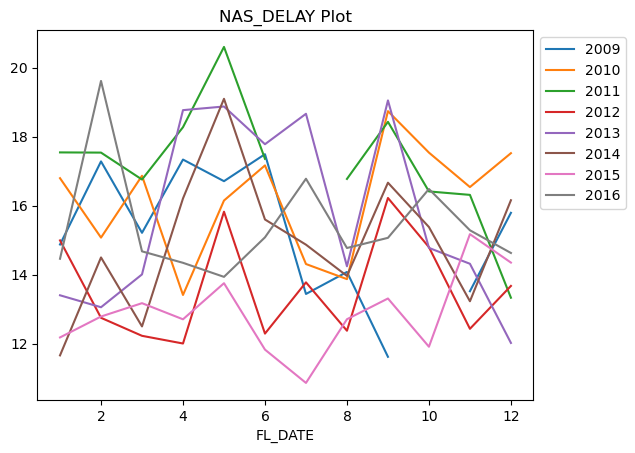

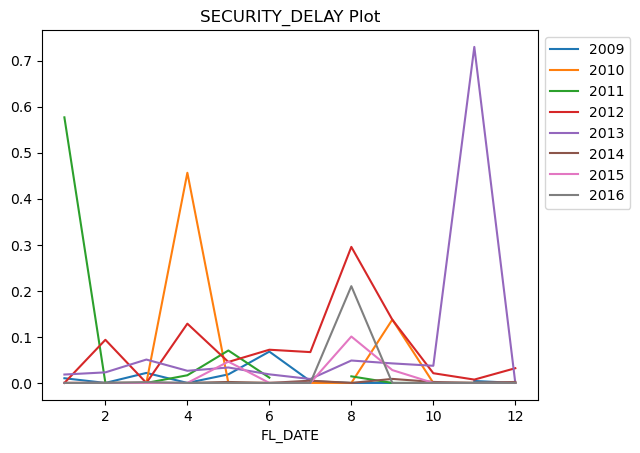

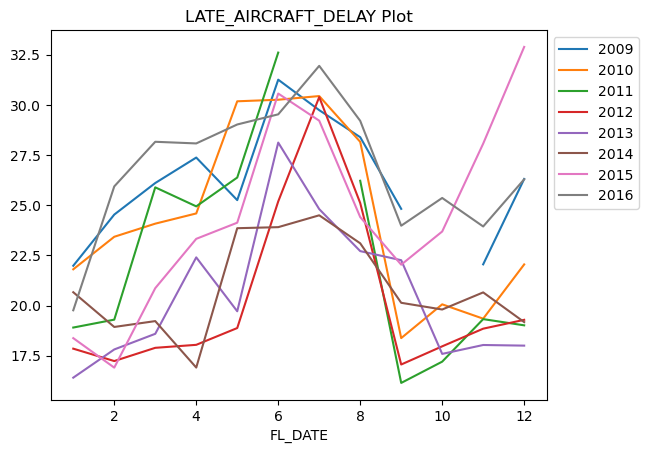

In [324]:
for col in col_to_sum:
    train_fl.groupby([train_fl.index.year, train_fl.index.month])[col].mean().unstack(0).plot(title=f'{col} Plot')
    plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
    plt.show()

### A look at histograms

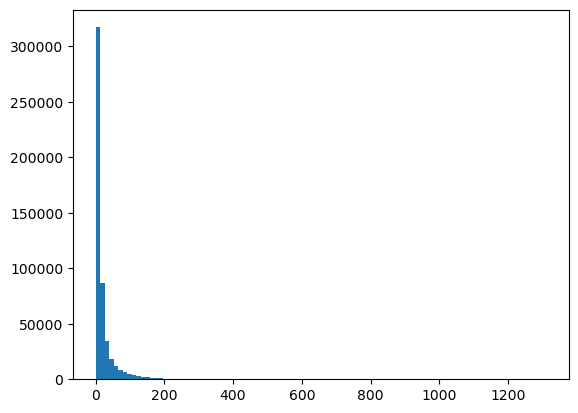

In [84]:
plt.hist(train_fl.CARRIER_DELAY, bins=100)
plt.show()

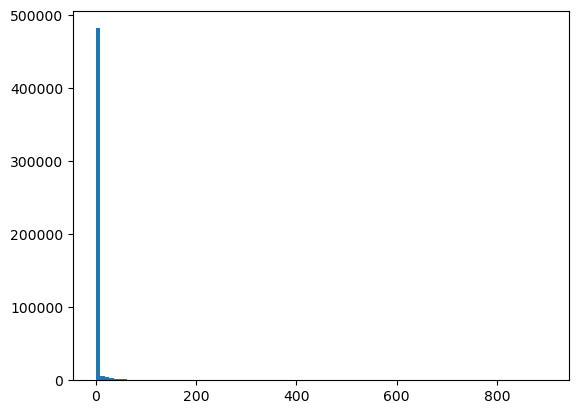

In [85]:
plt.hist(train_fl.WEATHER_DELAY, bins=100)
plt.show()

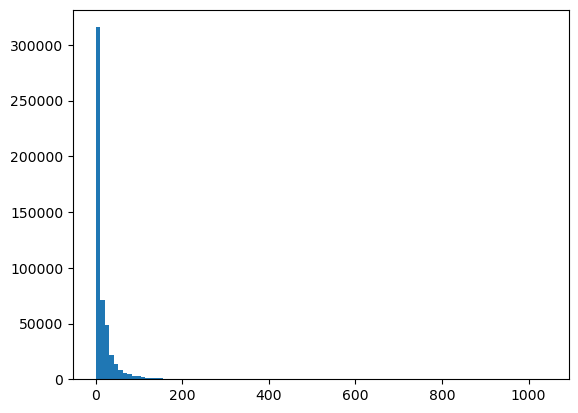

In [86]:
plt.hist(train_fl.NAS_DELAY, bins=100)
plt.show()

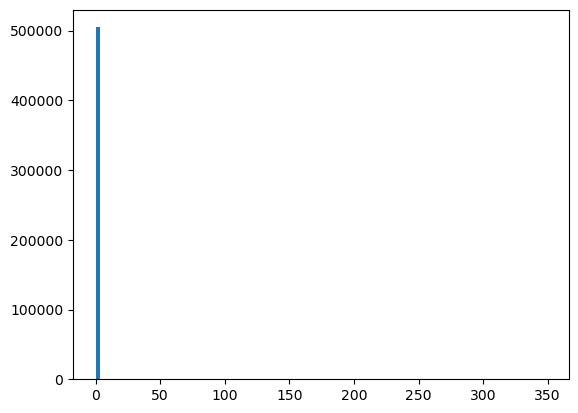

In [87]:
plt.hist(train_fl.SECURITY_DELAY, bins=100)
plt.show()

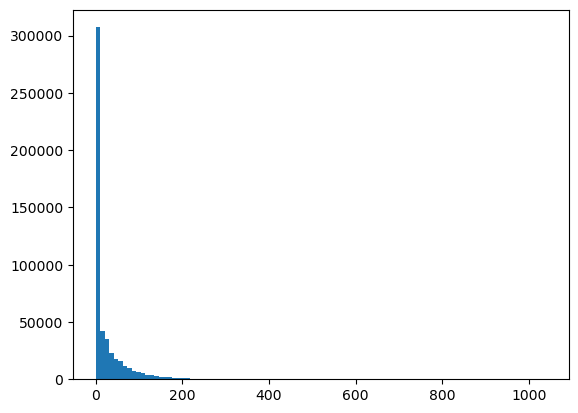

In [88]:
plt.hist(train_fl.LATE_AIRCRAFT_DELAY, bins=100)
plt.show()

### Find the best interval to define average delay by to optimize reducing noise while keeping good correlation results

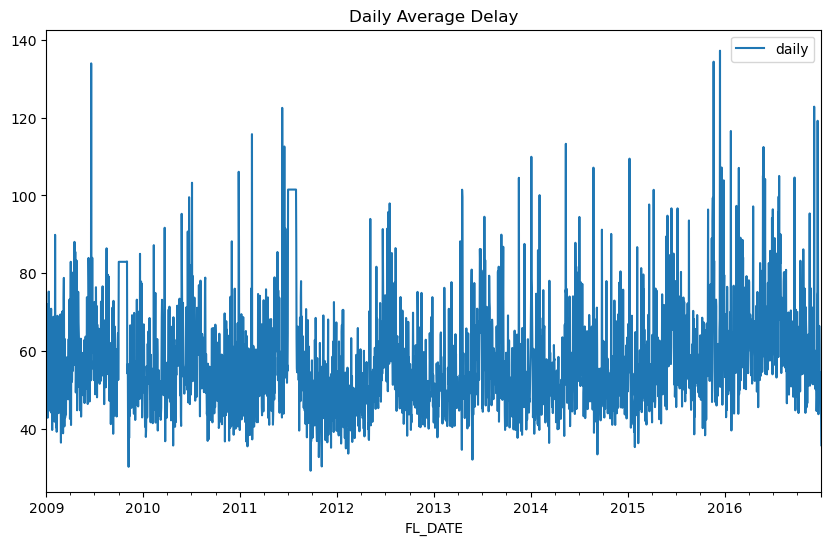

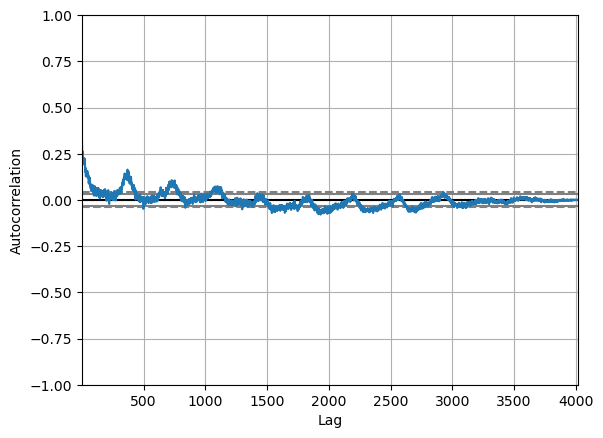

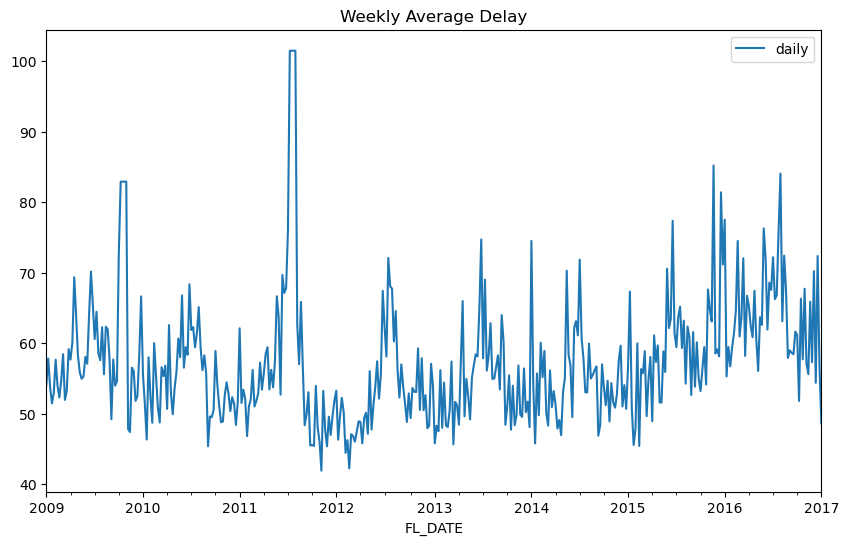

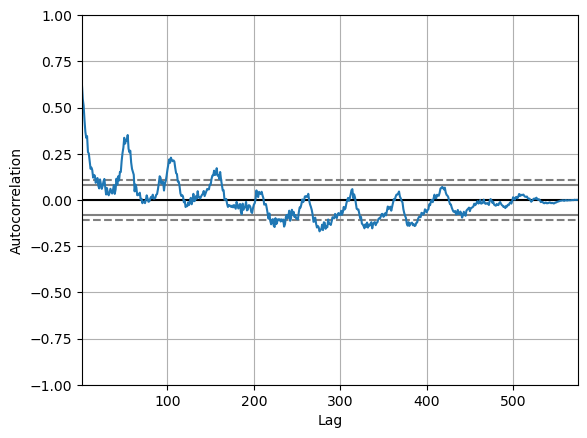

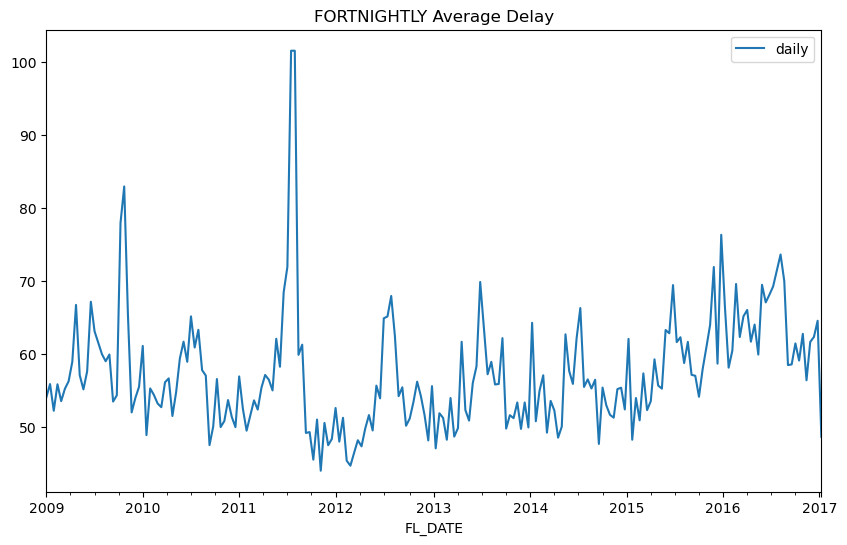

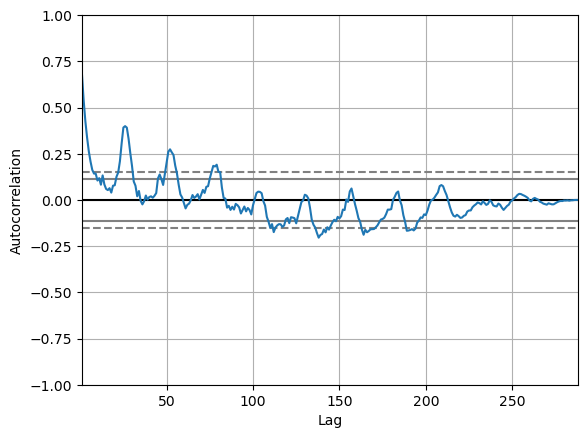

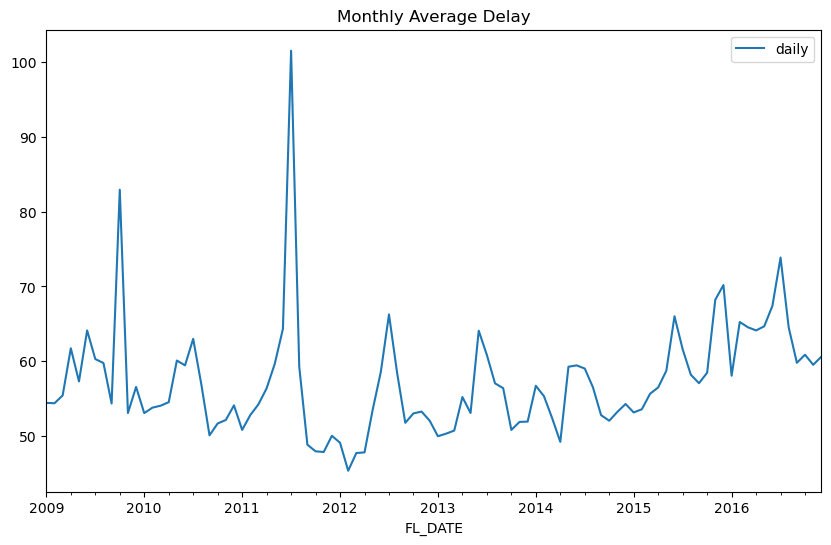

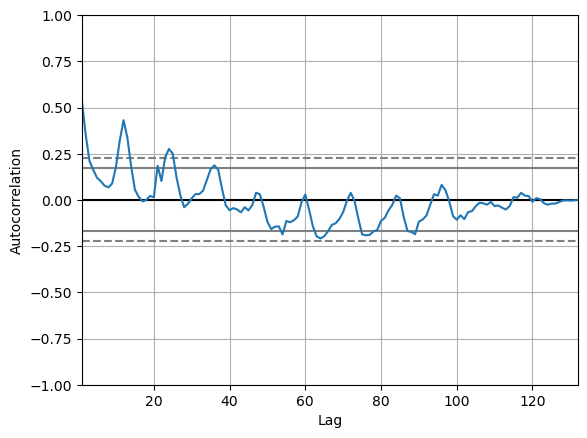

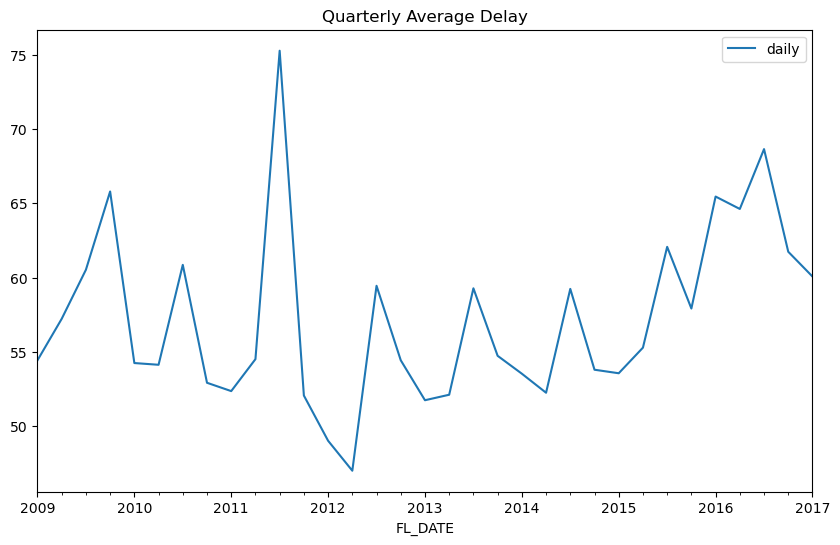

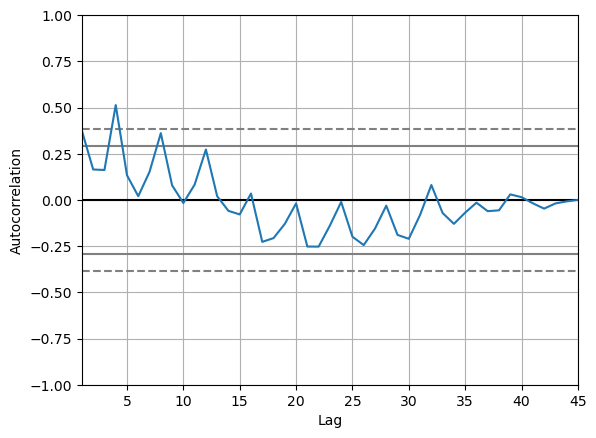

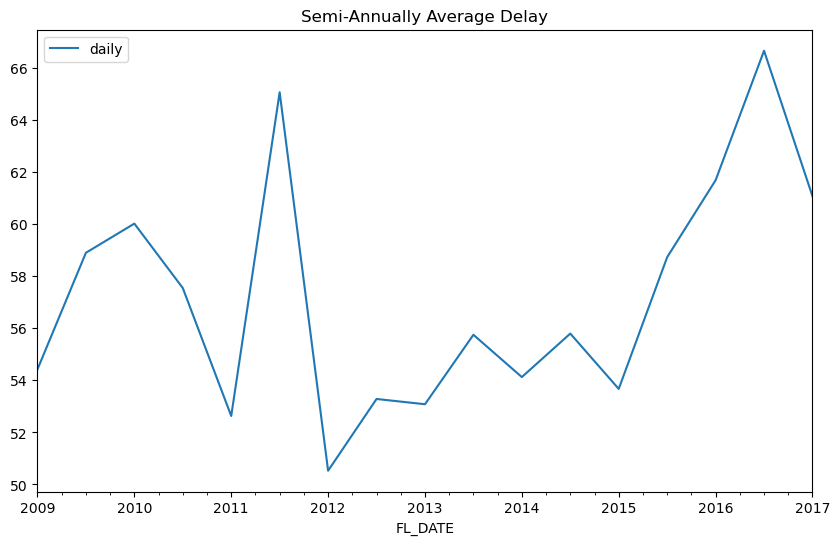

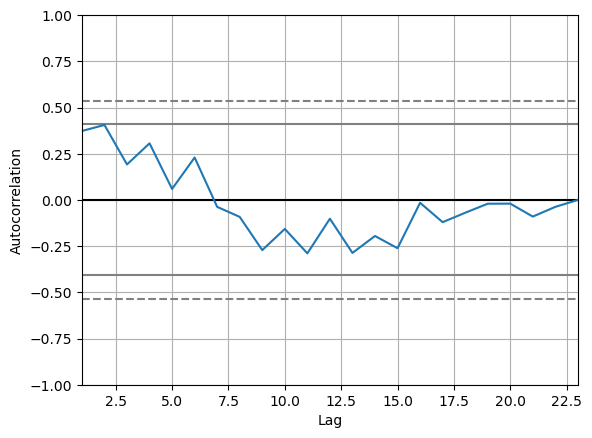

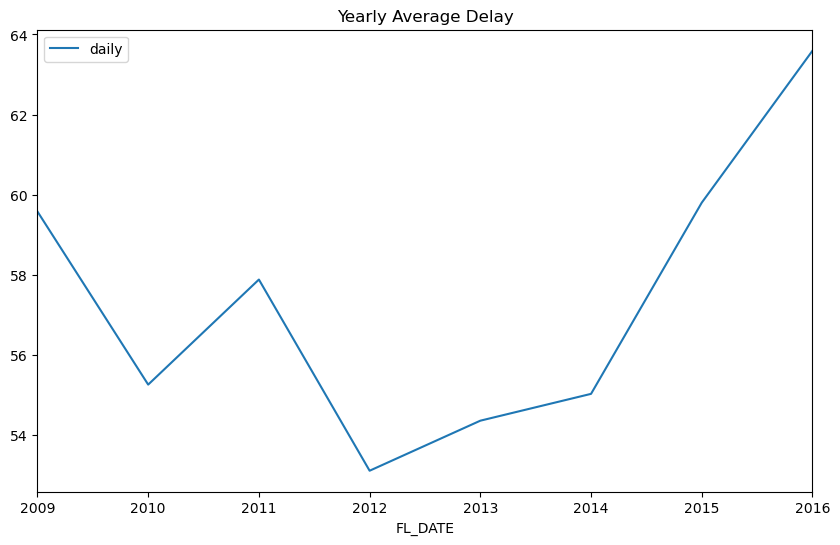

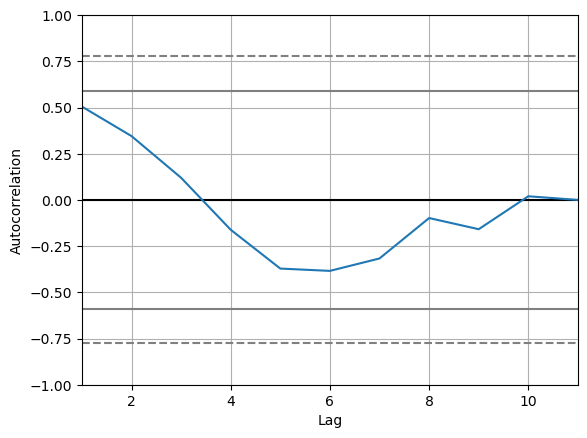

In [89]:
def plot_average_by_interval():
    
    resample_dict = {'D':'Daily', 'W':'Weekly', '2W':'FORTNIGHTLY', 'M':'Monthly', '3M':'Quarterly', '6M':'Semi-Annually', 'Y':'Yearly'}

    for _ in resample_dict:
        plt.figure(figsize=(10,6))

        train.resample(_).mean().average_delay.plot(label='daily')
        # flights_daily_mean.resample('W').mean().average_delay.plot(label='weekly')
        # flights_daily_mean.resample('M').mean().average_delay.plot(label='monthly')
        # flights_daily_mean.resample('Y').mean().average_delay.plot(label='yearly')


        plt.title(f'{resample_dict[_][0:]} Average Delay')
        plt.legend()
        plt.show()

        pd.plotting.autocorrelation_plot(df.average_delay.resample(_).mean())
        plt.show()

plot_average_by_interval()

### Plot the best lag plot based on the airline.  The best will always be 365

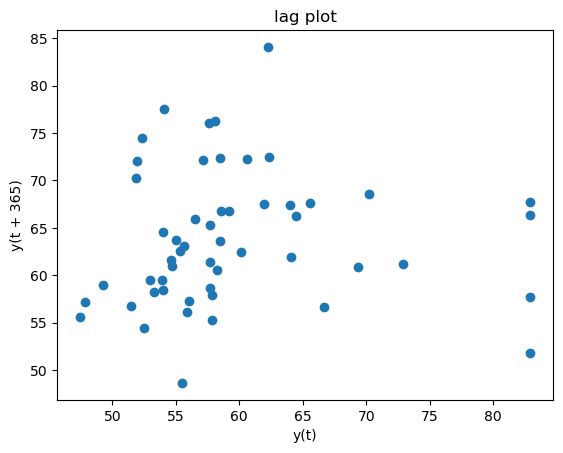

In [91]:
def plot_best_lag_plot():

    #Plots the best correlated lag
    pd.plotting.lag_plot(train.resample('W').mean(), lag=365)
    plt.title('lag plot');

plot_best_lag_plot()

### Plot the seasonal decompositions for the various time periods

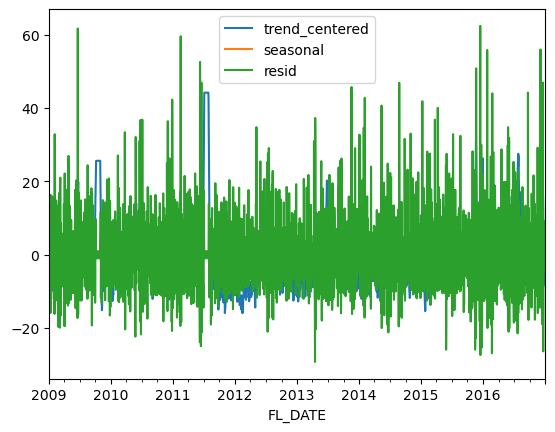

In [92]:
y = train.average_delay.resample('d').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

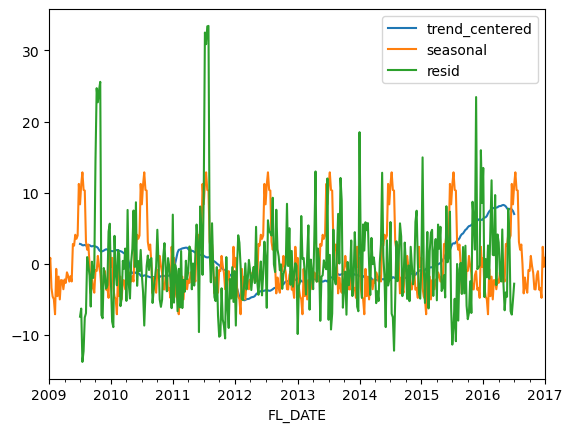

In [93]:
y = train.average_delay.resample('w').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

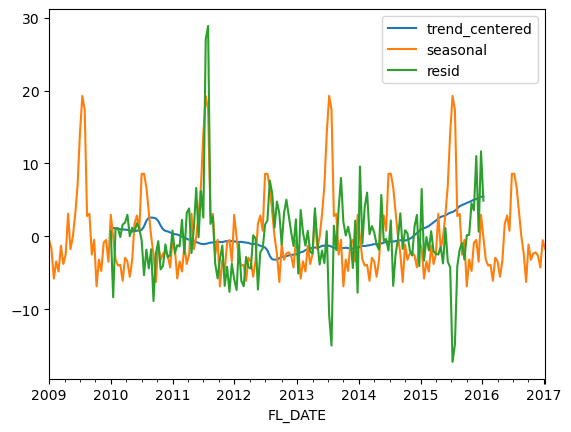

In [94]:
def seasonal_decomposition_plot(duration):
    y = train.average_delay.resample(duration).mean()

    result = sm.tsa.seasonal_decompose(y)

    decomposition = pd.DataFrame({
        'y': result.observed,
        'trend': result.trend,
        'seasonal': result.seasonal,
        'resid': result.resid
    })

    decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
    decomposition[['trend_centered', 'seasonal', 'resid']].plot();
    
seasonal_decomposition_plot('2w')

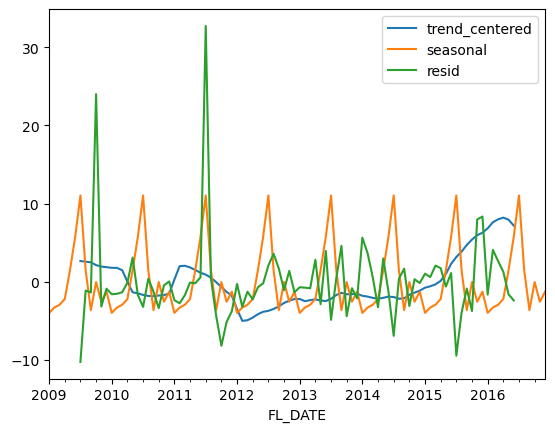

In [95]:
y = train.average_delay.resample('m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

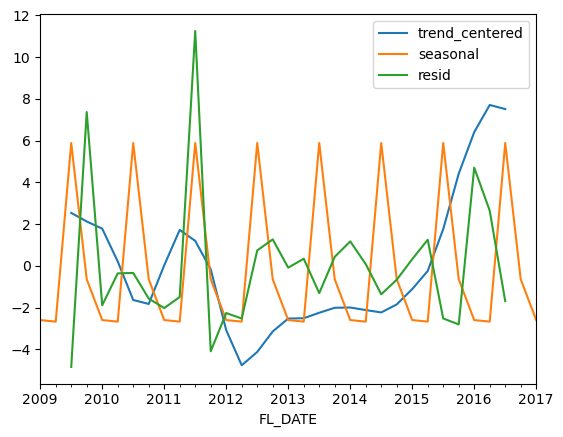

In [96]:
y = train.average_delay.resample('3m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

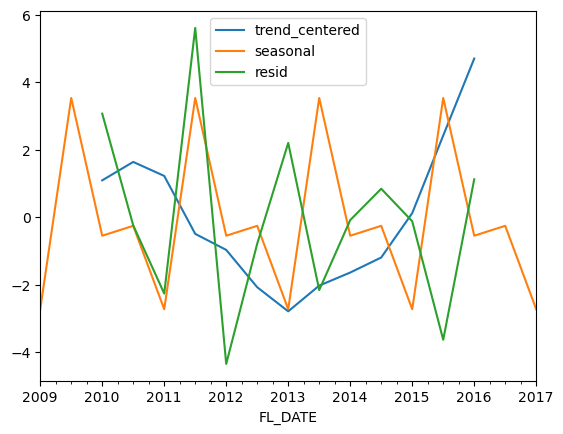

In [97]:
y = train.average_delay.resample('6m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

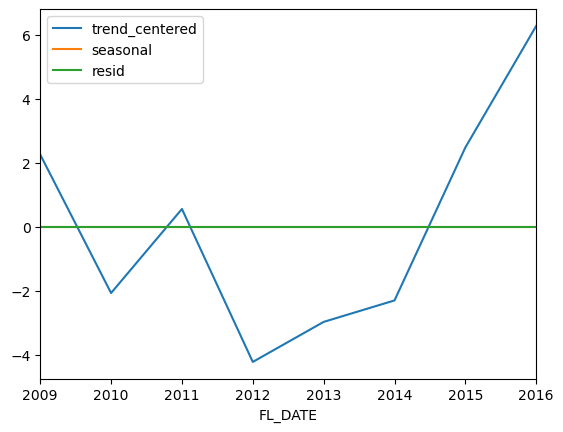

In [98]:
y = train.average_delay.resample('y').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

### Once again the best period to resample by seems to be 2 weeks or a fortnight

In [260]:
def clean_flight_data_for_average_daily_delay(flights):

    #creates a new column to create a total delay for each observation
    flights['total_delays'] = flights.CARRIER_DELAY + flights.WEATHER_DELAY + flights.NAS_DELAY + flights.SECURITY_DELAY + flights.LATE_AIRCRAFT_DELAY
    #Drops the now used columns
    flights = flights.drop(columns=['OP_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'])

    #impute by mean delay by averaging the "average delays" from the month before and after
    flights_monthly_mean = flights.resample('M').mean().total_delays
    impute_1 = flights_monthly_mean.loc['2009-09-30'] + flights_monthly_mean.loc['2009-11-30'] / 2
    impute_2 = flights_monthly_mean.loc['2011-06-30'] + flights_monthly_mean.loc['2011-08-31'] / 2
    
    #flights_daily_mean = flights.resample('D').mean().total_delays
    #Chose Dataframe
    flights_daily_mean = pd.DataFrame(flights.resample('D').mean().total_delays)
    
    #First imputation
    start_date = datetime.strptime("2009-10-01", "%Y-%m-%d")
    end_date = datetime.strptime("2009-10-31", "%Y-%m-%d")
    
    #Two lists to zip into tuple
    date_list = pd.date_range(start_date, end_date, freq='D')
    impute_1_list = [impute_1] * 31
    
    #Zip them and df them
    list_tuples = list(zip(date_list, impute_1_list))
    list_tuples = pd.DataFrame(list_tuples, columns=['FL_DATE', 'total_delays'])

    #datetime and index 
    list_tuples.FL_DATE = list_tuples.FL_DATE.astype('datetime64')
    list_tuples = list_tuples.set_index('FL_DATE')

    #Append to the daily mean df
    flights_daily_mean = flights_daily_mean.append(list_tuples)

    #Do the same with the second imputation
    start_date_2 = datetime.strptime("2011-07-01", "%Y-%m-%d")
    end_date_2 = datetime.strptime("2011-07-31", "%Y-%m-%d")
    date_list_2 = pd.date_range(start_date_2, end_date_2, freq='D')
    impute_2_list = [impute_2] * 31

    list_tuples_2 = list(zip(date_list_2, impute_2_list))
    list_tuples_2 = pd.DataFrame(list_tuples_2, columns=['FL_DATE', 'total_delays'])

    list_tuples_2.FL_DATE = list_tuples_2.FL_DATE.astype('datetime64')
    list_tuples_2 = list_tuples_2.set_index('FL_DATE')

    flights_daily_mean = flights_daily_mean.append(list_tuples_2)

    flights_daily_mean = flights_daily_mean[flights_daily_mean['total_delays'].notna()]

    flights_daily_mean = flights_daily_mean.rename(columns={'total_delays':'average_delay'})
    

    # finding only the rows with sum 0
    flights_daily_mean = flights_daily_mean[flights_daily_mean['average_delay']>0]

    flights_daily_mean = flights_daily_mean.sort_index()
    
    return flights_daily_mean

In [327]:
def means_by_airport(all_airline_df):
    
     # Sorted Origin airports by descending order
    origin_row_grp = pd.DataFrame(all_airline_df.groupby('ORIGIN')['row_sums'].mean())
    origin_row_grp = origin_row_grp.sort_values(by='row_sums', ascending=False)

    # List of airports by origin
    sorted_list = origin_row_grp.index.to_list()

    # Airpor Count
    airport_count = pd.DataFrame(all_airline_df.ORIGIN.value_counts())
    airport_count = airport_count.reindex(sorted_list)

    # Create the bar plot
    ax = origin_row_grp.plot.barh(width=0.5, ec='black', alpha=.5, figsize=(15, 9))

    # Set plot title and labels
    ax.set(title='Average Delay of All Airline', xlabel='Airport', ylabel='Avg. Delay')

    # Get the heights and positions for text labels
    ht_list = [ht for ht in origin_row_grp.row_sums]
    pos_list = list(range(len(origin_row_grp)))
    airport_val_list = [val for val in airport_count.ORIGIN]


    # Loop through the data and add text labels inside the existing plot
    for ht, pos, val in zip(ht_list, pos_list, airport_val_list):
        ax.text(ht-5, pos-.25, val, fontsize=15, ha='center', va='bottom', rotation=0)  # Adjust ha and va as needed

    # Show the plot
    plt.show()

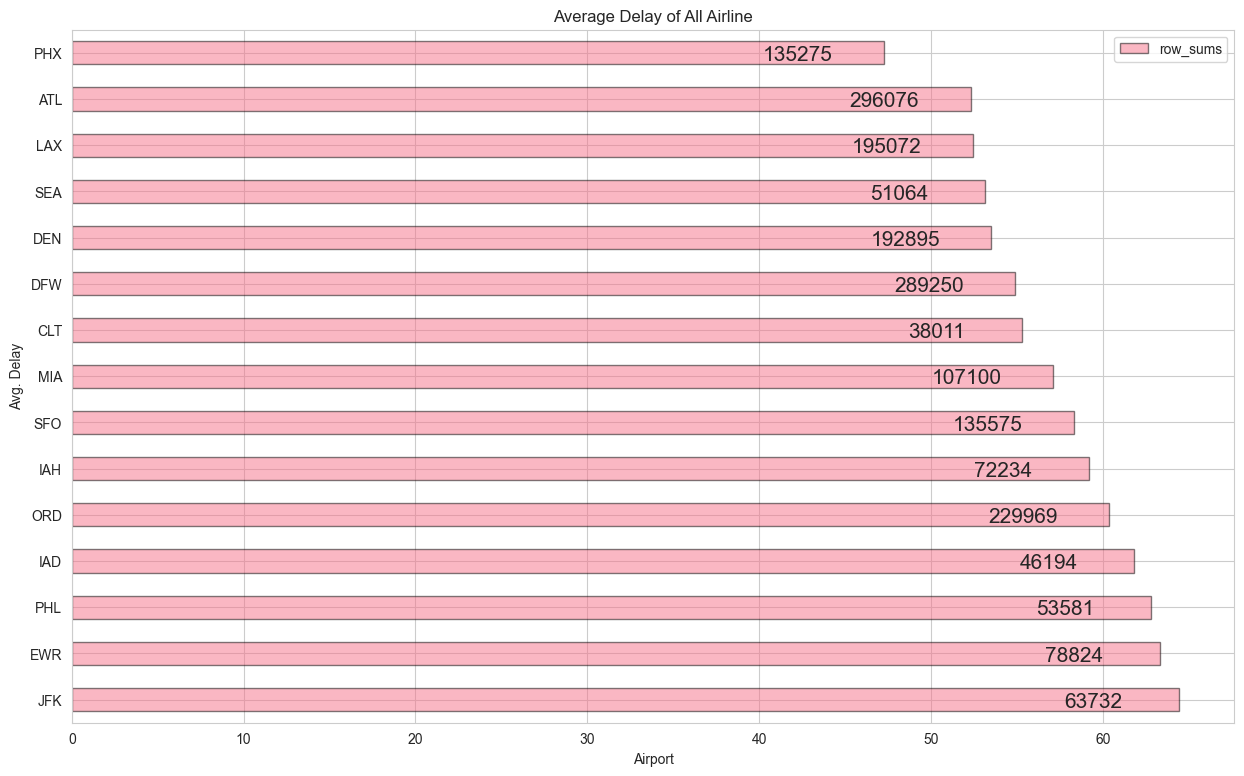

In [328]:
means_by_airport(all_airline_df)

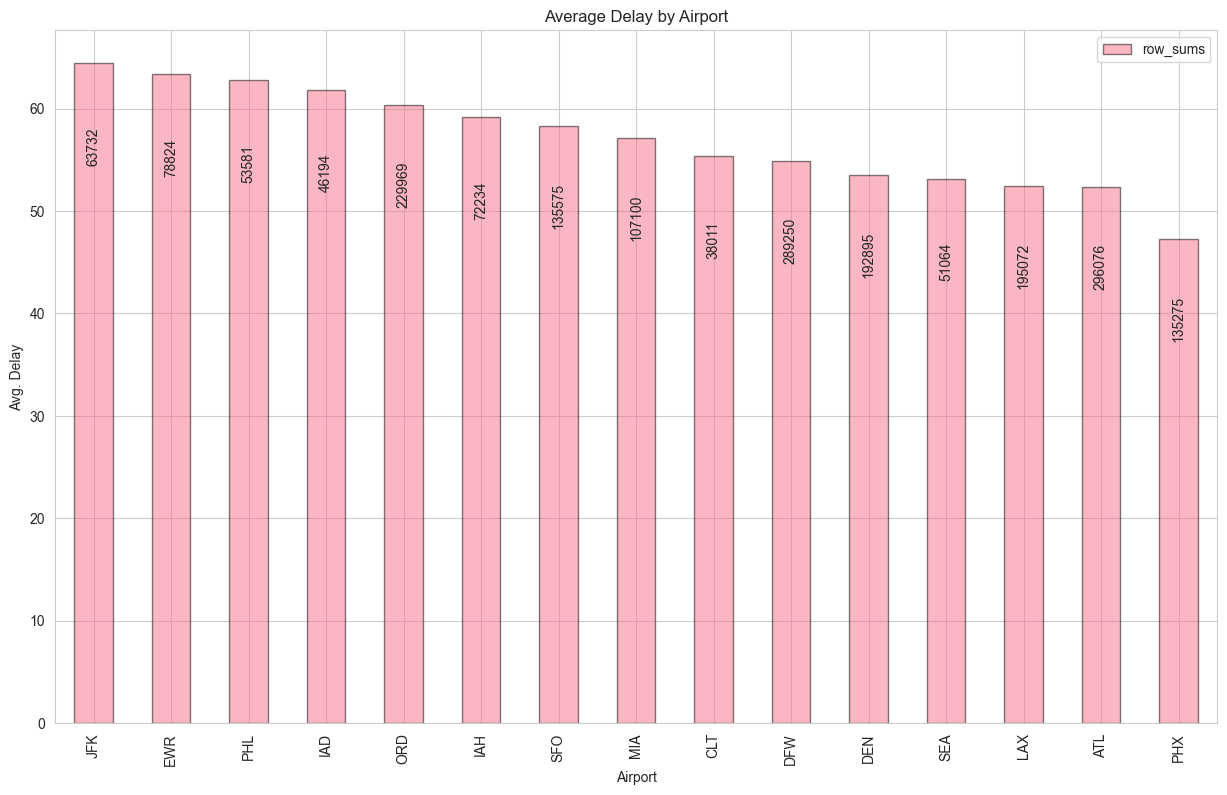

In [274]:
        
# Sorted Origin airports by descending order
origin_row_grp = pd.DataFrame(all_airline_df.groupby('ORIGIN')['row_sums'].mean())
origin_row_grp = origin_row_grp.sort_values(by='row_sums', ascending=False)

# List of airports by origin
sorted_list = origin_row_grp.index.to_list()

# Airpor Count
airport_count = pd.DataFrame(all_airline_df.ORIGIN.value_counts())
airport_count = airport_count.reindex(sorted_list)

# Create the bar plot
ax = origin_row_grp.plot.bar(width=0.5, ec='black', alpha=.5, figsize=(15, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

# Get the heights and positions for text labels
ht_list = [ht for ht in origin_row_grp.row_sums]
pos_list = list(range(len(origin_row_grp)))
airport_val_list = [val for val in airport_count.ORIGIN]


# Loop through the data and add text labels inside the existing plot
for ht, pos, val in zip(ht_list, pos_list, airport_val_list):
    ax.text(pos, ht-10, val, fontsize=10, ha='center', va='bottom', rotation=90)  # Adjust ha and va as needed

# Show the plot
plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
cities = {
    'City A': (40.7128, -74.0060),  # New York City
    'City B': (34.0522, -118.2437),  # Los Angeles
    'City C': (41.8781, -87.6298),  # Chicago
    'City D': (51.5074, -0.1278),   # London
    'City E': (48.8566, 2.3522),    # Paris
    # Add more cities as needed
}


In [4]:
# Create a grid of data for the heatmap
n = 100  # Number of data points
x = np.linspace(-180, 180, n)  # Longitude
y = np.linspace(-90, 90, n)    # Latitude
X, Y = np.meshgrid(x, y)

# Generate random intensities (replace with your data)
intensities = np.random.rand(n, n)


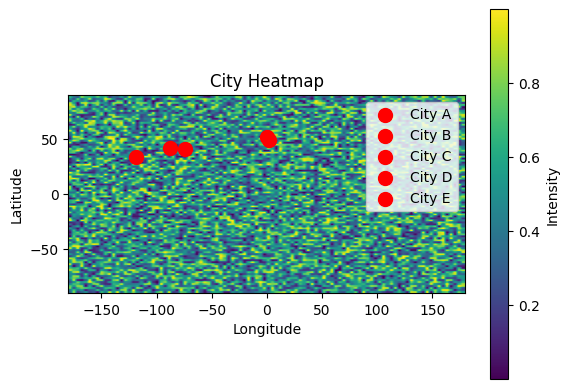

In [5]:
# Plot the heatmap
plt.imshow(intensities, extent=[-180, 180, -90, 90], cmap='viridis')
plt.colorbar(label='Intensity')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Heatmap')

# Mark city locations on the heatmap
for city, (lat, lon) in cities.items():
    plt.scatter(lon, lat, marker='o', color='red', label=city, s=100)

# Show the legend
plt.legend()

# Show the heatmap
plt.show()


In [21]:
from geopy.geocoders import Nominatim


In [74]:
import folium
import pandas as pd


In [75]:
top_15_hubs = [
    'Atlanta', 'Dallas', 'Denver', 'Orlando', 'Los Angeles', 'New York', 
    'Houston', 'Phoenix', 'Newark', 'San Francisco', 'Seattle', 'Washington', 
    'Philadelphia', 'Cleveland', 'Miami'
]

In [76]:
top_15_hubs = [
    'ATL', 'DFW', 'DEN', 'ORD', 'LAX', 'JFK', 'IAH', 'PHX', 'EWR', 'SFO',
    'SEA', 'IAD', 'PHL', 'CLT', 'MIA'
]

In [77]:
geolocator = Nominatim(user_agent="hub_locations")


In [81]:
top_15_hubs = [
    'Atlanta', 'Dallas', 'Denver', 'Orlando', 'Los Angeles', 'New York', 
    'Houston', 'Phoenix', 'Newark', 'San Francisco', 'Seattle', 'Washington', 
    'Philadelphia', 'Cleveland', 'Miami'
]

hub_coordinates = {}

for hub in top_15_hubs:
    location = geolocator.geocode(hub)
    if location:
        hub_coordinates[hub] = (location.latitude, location.longitude)


In [82]:
for hub, coordinates in hub_coordinates.items():
    print(f'{hub}: Latitude {coordinates[0]}, Longitude {coordinates[1]}')


Atlanta: Latitude 33.7489924, Longitude -84.3902644
Dallas: Latitude 32.7762719, Longitude -96.7968559
Denver: Latitude 39.7392364, Longitude -104.984862
Orlando: Latitude 28.5421109, Longitude -81.3790304
Los Angeles: Latitude 34.0536909, Longitude -118.242766
New York: Latitude 40.7127281, Longitude -74.0060152
Houston: Latitude 29.7589382, Longitude -95.3676974
Phoenix: Latitude 33.4484367, Longitude -112.074141
Newark: Latitude 40.735657, Longitude -74.1723667
San Francisco: Latitude 37.7790262, Longitude -122.419906
Seattle: Latitude 47.6038321, Longitude -122.330062
Washington: Latitude 38.8950368, Longitude -77.0365427
Philadelphia: Latitude 39.9527237, Longitude -75.1635262
Cleveland: Latitude 41.4996574, Longitude -81.6936772
Miami: Latitude 25.7741728, Longitude -80.19362


In [84]:
hub_coordinates

{'Atlanta': (33.7489924, -84.3902644),
 'Dallas': (32.7762719, -96.7968559),
 'Denver': (39.7392364, -104.984862),
 'Orlando': (28.5421109, -81.3790304),
 'Los Angeles': (34.0536909, -118.242766),
 'New York': (40.7127281, -74.0060152),
 'Houston': (29.7589382, -95.3676974),
 'Phoenix': (33.4484367, -112.074141),
 'Newark': (40.735657, -74.1723667),
 'San Francisco': (37.7790262, -122.419906),
 'Seattle': (47.6038321, -122.330062),
 'Washington': (38.8950368, -77.0365427),
 'Philadelphia': (39.9527237, -75.1635262),
 'Cleveland': (41.4996574, -81.6936772),
 'Miami': (25.7741728, -80.19362)}

In [69]:
import pandas as pd

data = {
    'Airport': ['ATL', 'DFW', 'DEN', 'ORD', 'LAX', 'JFK', 'IAH', 'PHX', 'EWR', 'SFO',
                'SEA', 'IAD', 'PHL', 'CLT', 'MIA'],
    'Latitude': [33.7489924, 32.7762719, 39.7392364, 28.5421109, 34.0536909, 40.7127281,
                 29.7589382, 33.448376, 40.735657, 37.7790262, 47.6038321, 38.8950368,
                 39.9527237, 41.4996574,25.7741728],
    'Longitude': [-84.3902644, -96.7968559, -104.984862, -81.3790304, -118.242766, 
                  -74.0060152, -95.3676974, -112.074036, -74.1723667, -122.419906, -122.330062,
                  -77.0365427, -75.1635262, -81.6936772, -80.19362]
}

cities_df = pd.DataFrame(data)


In [70]:
cities_df

,Airport,Latitude,Longitude
0,ATL,33.748992,-84.390264
1,DFW,32.776272,-96.796856
2,DEN,39.739236,-104.984862
3,ORD,28.542111,-81.379030
4,LAX,34.053691,-118.242766
5,JFK,40.712728,-74.006015
6,IAH,29.758938,-95.367697
7,PHX,33.448376,-112.074036
8,EWR,40.735657,-74.172367
9,SFO,37.779026,-122.419906


In [71]:
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)


In [72]:
from folium.plugins import HeatMap

coordinates = cities_df[['Latitude', 'Longitude']].values.tolist()

HeatMap(coordinates).add_to(us_map)


In [73]:
us_map.save('us_heatmap.html')  # Save the map to an HTML file
us_map  # Display the map (in Jupyter Notebook)


In [242]:
flights = wrangle.pull_airline_data('UA')
UA_count = flights.OP_CARRIER.value_counts()['UA']
UA_count

752467

In [243]:
flights['FL_DATE'] = flights['FL_DATE'].astype('datetime64')
# Split the data
train_fl_UA_df = flights.set_index('FL_DATE').loc[:'2016'] 
train_fl_UA_df

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,UA,726,SFO,EWR,0.0,0.0,18.0,0.0,0.0,18.0
2016-12-31,UA,769,ORD,SFO,56.0,0.0,0.0,0.0,0.0,56.0
2016-12-31,UA,775,ORD,DEN,10.0,0.0,9.0,0.0,0.0,19.0


In [244]:

train_fl_UA = pd.DataFrame({'avg_UA_delay': train_fl_UA_df[col_to_sum].mean()})
train_fl_UA

,avg_UA_delay
CARRIER_DELAY,18.985669
WEATHER_DELAY,2.342609
NAS_DELAY,14.893880
SECURITY_DELAY,0.036842
LATE_AIRCRAFT_DELAY,23.674062


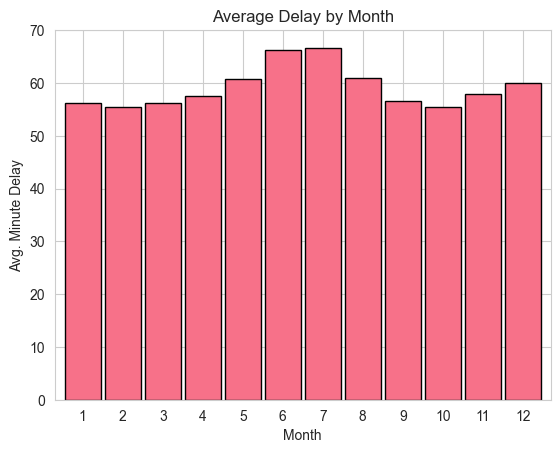

In [378]:
ax = train_fl_UA_df.groupby(train_fl_UA_df.index.month).row_sums.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

In [387]:
train_fl_UA_df.groupby(train_fl_UA_df.index.month).row_sums.mean()

FL_DATE
1     56.220583
2     55.505298
3     56.155798
4     57.562604
5     60.818578
6     66.188324
7     66.706825
8     61.052993
9     56.583199
10    55.457292
11    57.916770
12    60.034403
Name: row_sums, dtype: float64

In [245]:
flights = wrangle.pull_airline_data('WN')
SW_count = flights.OP_CARRIER.value_counts()['WN']
SW_count

548764

In [246]:
flights['FL_DATE'] = flights['FL_DATE'].astype('datetime64')
# Split the data
train_fl_WN_df = flights.set_index('FL_DATE').loc[:'2016'] 
train_fl_WN_df

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,WN,82,DEN,AMA,1.0,0.0,0.0,0.0,105.0,106.0
2009-01-01,WN,1023,DEN,AUS,16.0,0.0,0.0,0.0,0.0,16.0
2009-01-01,WN,2494,DEN,AUS,34.0,0.0,0.0,0.0,0.0,34.0
2009-01-01,WN,1469,DEN,BNA,35.0,0.0,0.0,0.0,0.0,35.0
2009-01-01,WN,2799,DEN,IND,14.0,0.0,1.0,0.0,4.0,19.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,WN,6778,SEA,SNA,0.0,0.0,26.0,0.0,0.0,26.0
2016-12-31,WN,1683,SFO,LAS,11.0,0.0,0.0,0.0,11.0,22.0
2016-12-31,WN,1860,SFO,LAX,0.0,0.0,47.0,0.0,0.0,47.0


In [247]:

train_fl_WN = pd.DataFrame({'avg_WN_delay': train_fl_WN_df[col_to_sum].mean()})
train_fl_WN

,avg_WN_delay
CARRIER_DELAY,14.080613
WEATHER_DELAY,1.367219
NAS_DELAY,6.856146
SECURITY_DELAY,0.074819
LATE_AIRCRAFT_DELAY,26.885827


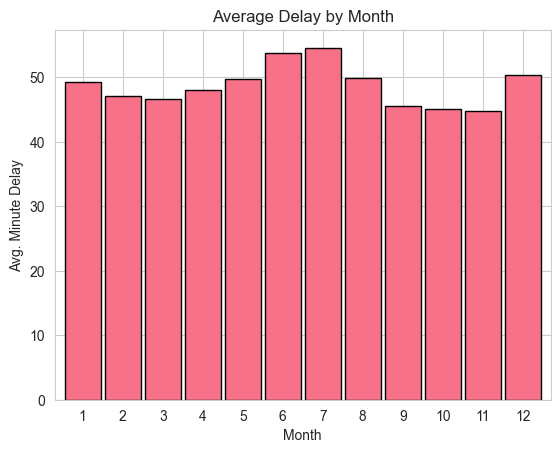

In [379]:
ax = train_fl_WN_df.groupby(train_fl_WN_df.index.month).row_sums.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

In [386]:
train_fl_WN_df.groupby(train_fl_WN_df.index.month).row_sums.mean()

FL_DATE
1     49.246894
2     47.131870
3     46.620604
4     48.069193
5     49.708213
6     53.786394
7     54.610132
8     49.840238
9     45.634059
10    45.031384
11    44.764754
12    50.430000
Name: row_sums, dtype: float64

In [248]:
flights = wrangle.pull_airline_data('AA')
AA_count = flights.OP_CARRIER.value_counts()['AA']
AA_count

1050420

In [249]:
flights['FL_DATE'] = flights['FL_DATE'].astype('datetime64')
# Split the data
train_fl_AA_df = flights.set_index('FL_DATE').loc[:'2016'] 
train_fl_AA_df

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,AA,2,LAX,JFK,35.0,0.0,0.0,0.0,0.0,35.0
2009-01-01,AA,16,SFO,JFK,83.0,0.0,0.0,0.0,0.0,83.0
2009-01-01,AA,75,IAD,LAX,35.0,0.0,0.0,0.0,7.0,42.0
2009-01-01,AA,76,LAX,IAD,15.0,0.0,0.0,0.0,0.0,15.0
2009-01-01,AA,85,JFK,SFO,26.0,0.0,0.0,0.0,16.0,42.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,AA,2597,LAX,AUS,0.0,0.0,0.0,0.0,15.0,15.0
2016-12-31,AA,2603,DFW,EGE,105.0,0.0,4.0,0.0,0.0,109.0
2016-12-31,AA,2648,SFO,MIA,31.0,0.0,10.0,0.0,0.0,41.0


In [250]:
train_fl_AA = pd.DataFrame({'avg_AA_delay': train_fl_AA_df[col_to_sum].mean()})
train_fl_AA

,avg_AA_delay
CARRIER_DELAY,20.265749
WEATHER_DELAY,3.682269
NAS_DELAY,13.522847
SECURITY_DELAY,0.068960
LATE_AIRCRAFT_DELAY,18.889776


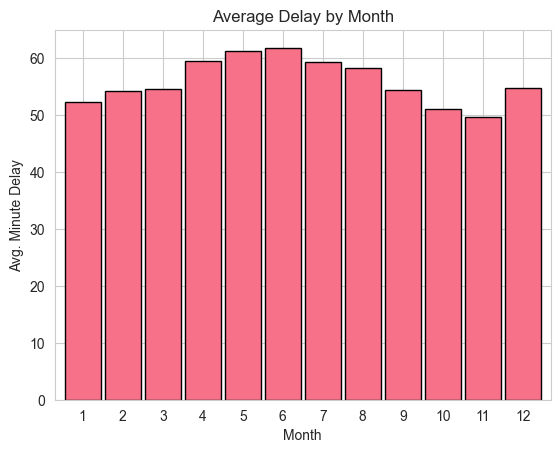

In [380]:
ax = train_fl_AA_df.groupby(train_fl_AA_df.index.month).row_sums.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

In [385]:
train_fl_AA_df.groupby(train_fl_AA_df.index.month).row_sums.mean()

FL_DATE
1     52.219844
2     54.256856
3     54.588368
4     59.502082
5     61.196556
6     61.835331
7     59.366029
8     58.358794
9     54.397973
10    51.000709
11    49.705598
12    54.812522
Name: row_sums, dtype: float64

In [251]:
flights = wrangle.pull_airline_data('DL')
DL_count = flights.OP_CARRIER.value_counts()['DL']
DL_count

611682

In [252]:
flights['FL_DATE'] = flights['FL_DATE'].astype('datetime64')
# Split the data
train_fl_DL_df = flights.set_index('FL_DATE').loc[:'2016'] 
train_fl_DL_df

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,DL,4,JFK,MCO,0.0,0.0,0.0,0.0,92.0,92.0
2009-01-01,DL,8,IAH,ATL,0.0,0.0,0.0,0.0,264.0,264.0
2009-01-01,DL,25,ATL,LAS,26.0,0.0,0.0,0.0,0.0,26.0
2009-01-01,DL,35,ATL,MCO,20.0,0.0,7.0,0.0,0.0,27.0
2009-01-01,DL,57,ATL,IAH,0.0,0.0,16.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,DL,2065,JFK,FLL,6.0,0.0,15.0,0.0,7.0,28.0
2016-12-31,DL,2190,JFK,MIA,0.0,0.0,46.0,0.0,0.0,46.0
2016-12-31,DL,2202,SEA,KOA,0.0,0.0,4.0,0.0,32.0,36.0


In [253]:
train_fl_DL = pd.DataFrame({'avg_DL_delay': train_fl_DL_df[col_to_sum].mean()})
train_fl_DL

,avg_DL_delay
CARRIER_DELAY,20.630327
WEATHER_DELAY,3.780297
NAS_DELAY,14.273442
SECURITY_DELAY,0.037860
LATE_AIRCRAFT_DELAY,16.700257


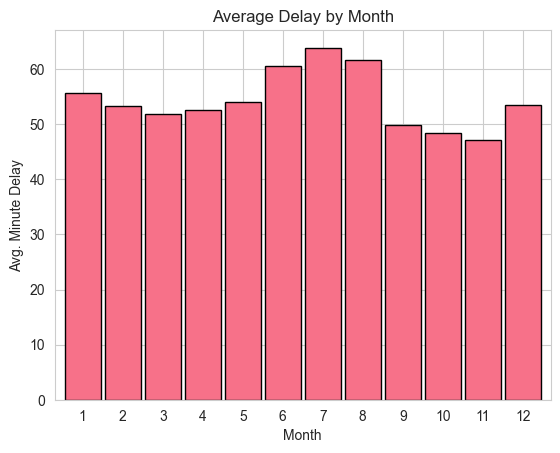

In [381]:
ax = train_fl_DL_df.groupby(train_fl_DL_df.index.month).row_sums.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

In [384]:
train_fl_DL_df.groupby(train_fl_DL_df.index.month).row_sums.mean()

FL_DATE
1     55.706314
2     53.344425
3     51.851877
4     52.531083
5     54.102628
6     60.488771
7     63.887636
8     61.668680
9     49.927037
10    48.497213
11    47.125035
12    53.486760
Name: row_sums, dtype: float64

In [256]:

# List of DataFrames to concatenate
airline_df_list = [train_fl_UA_df, train_fl_AA_df, train_fl_DL_df, train_fl_WN_df]

# Concatenate the DataFrames horizontally on indices
all_airline_df = pd.concat(airline_df_list, axis=0)

# Display the concatenated DataFrame
all_airline_df

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,WN,6778,SEA,SNA,0.0,0.0,26.0,0.0,0.0,26.0
2016-12-31,WN,1683,SFO,LAS,11.0,0.0,0.0,0.0,11.0,22.0
2016-12-31,WN,1860,SFO,LAX,0.0,0.0,47.0,0.0,0.0,47.0


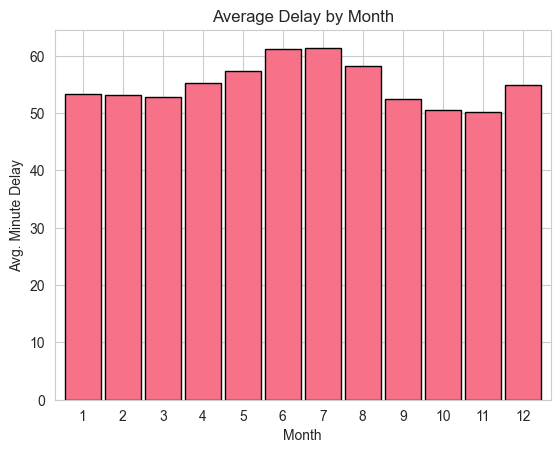

In [382]:
ax = all_airline_df.groupby(all_airline_df.index.month).row_sums.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

In [383]:
all_airline_df.groupby(all_airline_df.index.month).row_sums.mean()

FL_DATE
1     53.372673
2     53.174268
3     52.868950
4     55.272314
5     57.360663
6     61.243493
7     61.414832
8     58.206446
9     52.404590
10    50.519745
11    50.141488
12    54.846569
Name: row_sums, dtype: float64

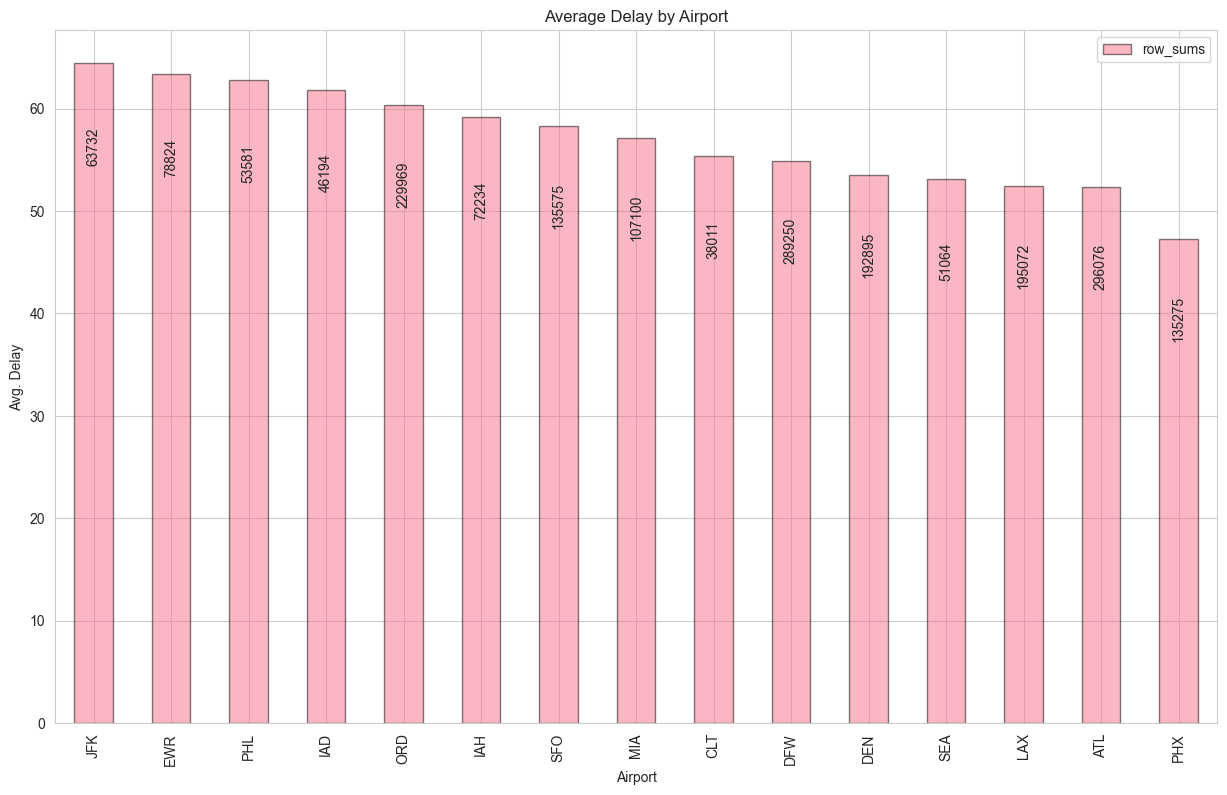

In [278]:
means_by_airport(all_airline_df)

In [375]:
origin_row_grp_all = pd.DataFrame(all_airline_df.groupby('ORIGIN')['row_sums'].mean()).sort_values(by='row_sums', ascending=False)
origin_row_grp_all

,row_sums
ORIGIN,
JFK,64.424355
EWR,63.339770
PHL,62.797223
IAD,61.830865
ORD,60.357126
IAH,59.171387
SFO,58.291934
MIA,57.086116
CLT,55.321539


In [259]:
all_airline_df.dtypes

OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
row_sums               float64
dtype: object

In [262]:
all_df = clean_flight_data_for_average_daily_delay(all_airline_df)
all_df.head()

/var/folders/qh/kjmdb2zx3n3b2ng_n4q3cyn00000gn/T/ipykernel_5890/1380433528.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_monthly_mean = flights.resample('M').mean().total_delays
/var/folders/qh/kjmdb2zx3n3b2ng_n4q3cyn00000gn/T/ipykernel_5890/1380433528.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_daily_mean = pd.DataFrame(flights.resample('D').mean().total_delays)
/var/folders/qh/kjmdb2zx3n3b2ng_n4q3cyn00000gn/T/ipykernel_5890/1380433528.py:30: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' in

,average_delay
FL_DATE,
2009-01-01,50.384615
2009-01-02,58.493734
2009-01-03,59.406332
2009-01-04,47.195813
2009-01-05,56.228440


In [288]:
all_airline_df.shape

(1984852, 11)

In [287]:
all_df.shape

(2922, 1)

In [268]:
sorted_all_df = all_df.sort_values(ascending=False, by='average_delay')
sorted_all_df.head()

,average_delay
FL_DATE,
2016-08-08,137.081098
2016-12-17,103.379207
2009-09-21,99.206697
2016-08-09,99.185087
2014-08-08,98.674005


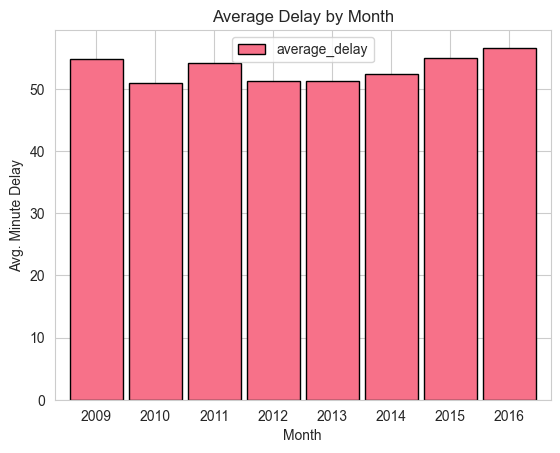

In [286]:
ax = all_df.groupby(all_df.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

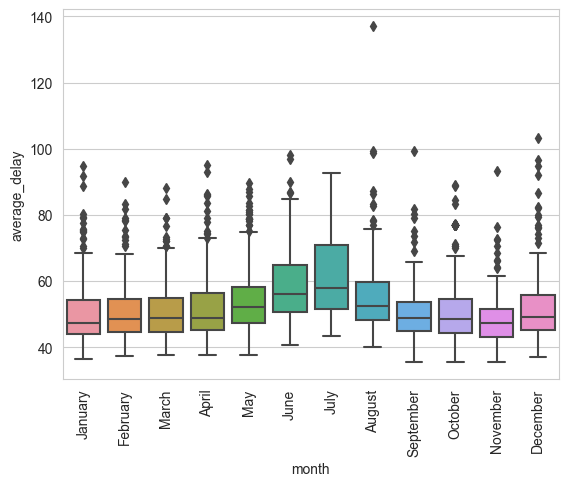

In [263]:
(
    all_df.reset_index()
    .assign(month=lambda all_df: all_df.FL_DATE.dt.month_name())
    .pipe((sns.boxplot, 'data'), y='average_delay', x='month')
)
plt.xticks(rotation=90)
plt.show()

In [216]:

# List of DataFrames to concatenate
dfs_to_concat = [train_fl_AA, train_fl_DL, train_fl_WN, train_fl_UA]

# Concatenate the DataFrames horizontally on indices
all_avg_df = pd.concat(dfs_to_concat, axis=1)

# Display the concatenated DataFrame
all_avg_df


,avg_AA_delay,avg_DL_delay,avg_WN_delay,avg_delay
CARRIER_DELAY,20.265749,20.630327,14.080613,18.985669
WEATHER_DELAY,3.682269,3.780297,1.367219,2.342609
NAS_DELAY,13.522847,14.273442,6.856146,14.893880
SECURITY_DELAY,0.068960,0.037860,0.074819,0.036842
LATE_AIRCRAFT_DELAY,18.889776,16.700257,26.885827,23.674062


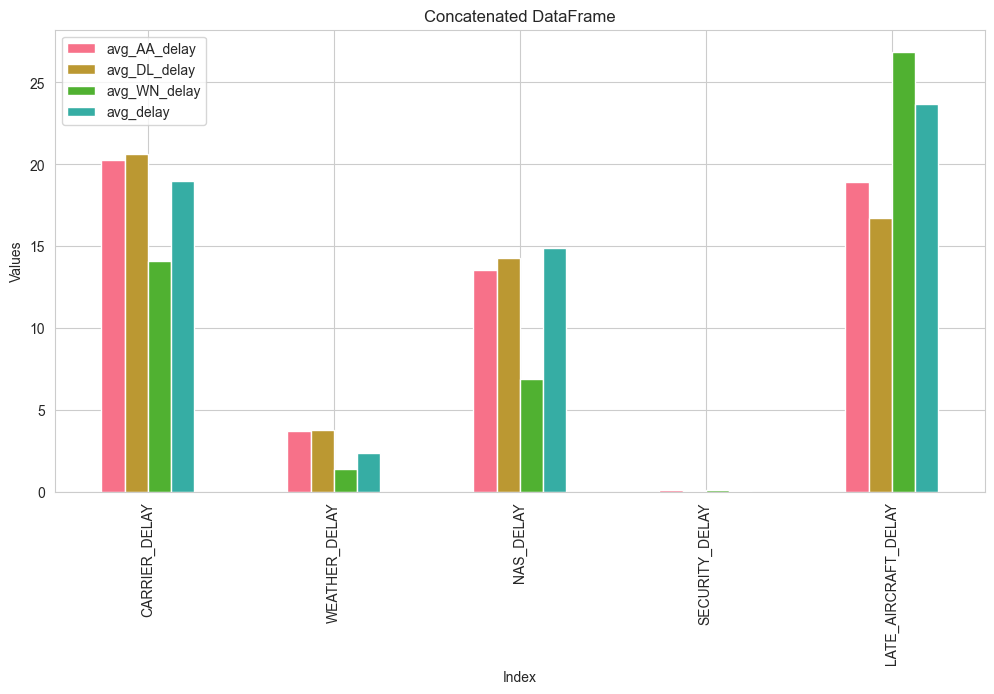

In [221]:


# Create a bar plot
ax = all_avg_df.plot(kind='bar', figsize=(12, 6), stacked=False)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Concatenated DataFrame')

# Show the plot
plt.show()


In [205]:
flight_count_dict = {
    'UA': UA_count,
    'SW': SW_count,
    'AA': AA_count,
    'DL': DL_count
}

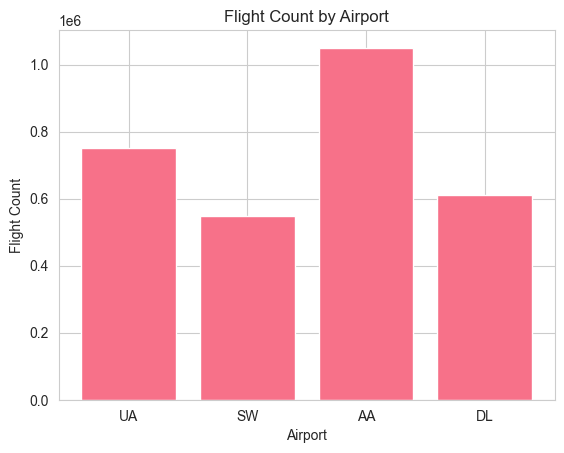

In [179]:
flight_count_dict = {
    'UA': UA_count,
    'SW': SW_count,
    'AA': AA_count,
    'DL': DL_count
}

# Extract keys (airports) and values (counts) from the dictionary
airports = flight_count_dict.keys()
counts = flight_count_dict.values()

# Create a bar plot
plt.bar(airports, counts)

# Set labels and title
plt.xlabel('Airport')
plt.ylabel('Flight Count')
plt.title('Flight Count by Airport')

# Show the plot
plt.show()

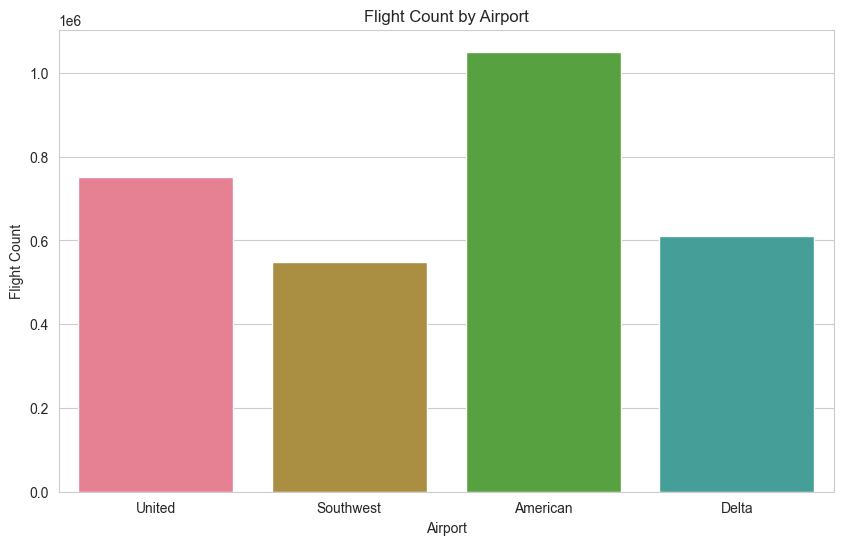

In [180]:
data = pd.DataFrame({'Airport': ['United', 'Southwest', 'American', 'Delta'], 'Flight Count': list(flight_count_dict.values())})

# Set the Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")  # You can change "husl" to other Seaborn palettes like "Set2", "deep", etc.

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.barplot(x="Airport", y="Flight Count", data=data)

# Customize labels and title
plt.xlabel('Airport')
plt.ylabel('Flight Count')
plt.title('Flight Count by Airport')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [219]:
data

,Airport,Flight Count
0,United,752467
1,Southwest,548764
2,American,1050420
3,Delta,611682


In [181]:
flights.columns.tolist()

['FL_DATE',
 'OP_CARRIER',
 'OP_CARRIER_FL_NUM',
 'ORIGIN',
 'DEST',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'row_sums']

In [140]:
train_fl

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,UA,726,SFO,EWR,0.0,0.0,18.0,0.0,0.0,18.0
2016-12-31,UA,769,ORD,SFO,56.0,0.0,0.0,0.0,0.0,56.0
2016-12-31,UA,775,ORD,DEN,10.0,0.0,9.0,0.0,0.0,19.0


In [142]:
train_delays = train_fl.groupby('FL_DATE')[col_to_sum].sum()#.max()
train_delays

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,2341.0,109.0,875.0,0.0,3081.0
2009-01-02,2964.0,24.0,3170.0,0.0,4918.0
2009-01-03,2461.0,115.0,1582.0,0.0,3658.0
2009-01-04,1561.0,386.0,731.0,0.0,2170.0
2009-01-05,1692.0,223.0,1259.0,0.0,3354.0
...,...,...,...,...,...
2016-12-27,4626.0,0.0,1989.0,0.0,5965.0
2016-12-28,3123.0,14.0,1963.0,0.0,4919.0
2016-12-29,3340.0,24.0,2364.0,0.0,5186.0


In [150]:
trn_mean = pd.DataFrame({'avg_delay': train_delays.mean()})
trn_mean

,avg_delay
CARRIER_DELAY,3353.267483
WEATHER_DELAY,413.753846
NAS_DELAY,2630.571678
SECURITY_DELAY,6.506993
LATE_AIRCRAFT_DELAY,4181.336014


In [138]:
train_fl.groupby(['CARRIER_DELAY']).mean()#.max()

/var/folders/qh/kjmdb2zx3n3b2ng_n4q3cyn00000gn/T/ipykernel_5890/129643721.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_fl.groupby(['CARRIER_DELAY']).mean()#.max()


,OP_CARRIER_FL_NUM,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
CARRIER_DELAY,,,,,,
0.0,816.482097,5.579352,28.858755,0.087745,22.784212,57.310064
1.0,986.526521,0.000000,2.514811,0.000000,49.702181,53.216992
2.0,974.018942,0.000000,2.427782,0.000000,49.128453,53.556235
3.0,950.328843,0.000000,2.465285,0.000000,47.127288,52.592573
4.0,933.964668,0.000000,2.424144,0.000000,45.271967,51.696110
...,...,...,...,...,...,...
1181.0,478.000000,0.000000,0.000000,0.000000,0.000000,1181.000000
1185.0,420.000000,0.000000,0.000000,0.000000,0.000000,1185.000000
1204.0,301.000000,0.000000,0.000000,0.000000,0.000000,1204.000000


In [289]:
all_airline_df.head(3)

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums,total_delays
FL_DATE,,,,,,,,,,,
2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0,45.0
2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0,162.0
2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0,130.0


In [332]:
125000*52*10


65000000

In [299]:
all_airline_df.total_delays.mean()

55.72896921281788

In [300]:
55.7*101.18

5635.726000000001

In [293]:
airlines_list = ['UA', 'WN', 'DL', 'AA']

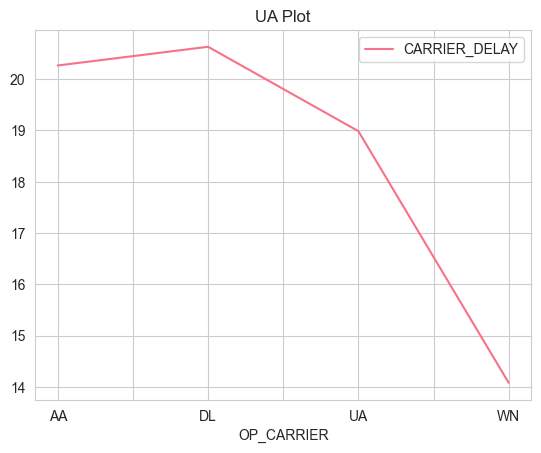

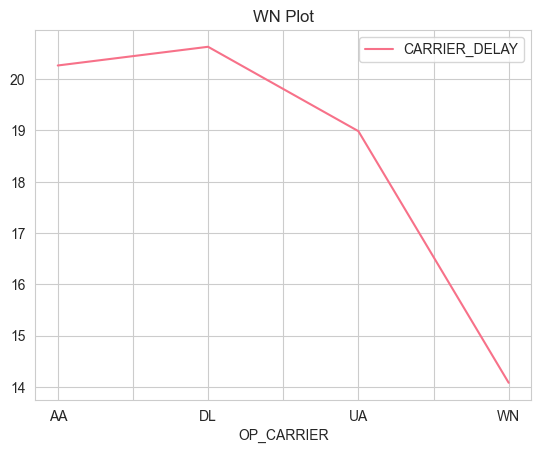

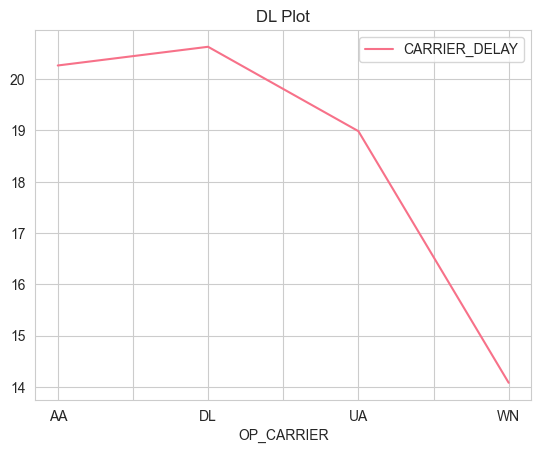

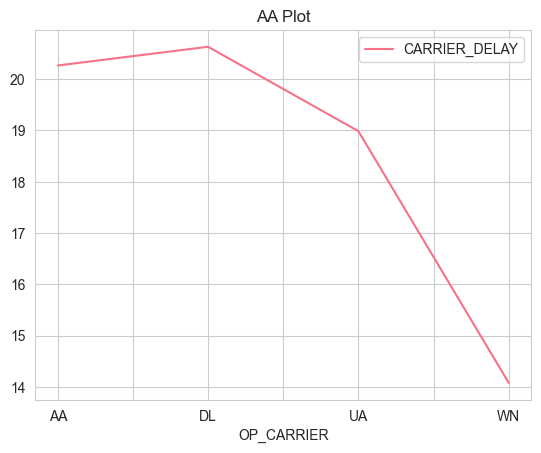

In [296]:
for airline in airlines_list:
    all_airline_df.groupby([all_airline_df.OP_CARRIER])['CARRIER_DELAY'].mean().plot(title=f'{airline} Plot')
    plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
    plt.show()

In [346]:
def pull_airport_count():
    filename = 'airline delay analysis/2009.csv'
    data = pd.read_csv(filename, index_col=[0])
    df = pd.DataFrame(data)
    count = df.ORIGIN.value_counts()
    return count

In [338]:
def pull_airline_count():
    filename = 'airline delay analysis/2009.csv'
    data = pd.read_csv(filename, index_col=[0])
    df = pd.DataFrame(data)
    count = df.OP_CARRIER.value_counts()
    return count
    

In [350]:
airline_count = pull_airline_count()

In [351]:
airline_count

WN    1128947
AA     550056
OO     546195
MQ     435670
DL     426036
US     412008
UA     376272
XE     309360
EV     298696
NW     292400
9E     262269
CO     256446
FL     249954
YV     243060
B6     194109
OH     150970
AS     137140
F9      87002
HA      72748
Name: OP_CARRIER, dtype: int64

In [352]:
airline_count.nunique()

19

In [353]:
airport_count = pull_airport_count()

In [358]:
airport_count

ATL    417449
ORD    313848
DFW    264396
DEN    235675
LAX    192879
        ...  
LWB        58
SUX        56
BJI        54
RHI        41
PIR         3
Name: ORIGIN, Length: 296, dtype: int64

In [357]:
airport_count.nunique()

290

In [360]:
def means_by_airport(train_fl):
    
        
    # Sorted Origin airports by descending order
    origin_row_grp = pd.DataFrame(train_fl.groupby('ORIGIN')['row_sums'].mean())
    origin_row_grp = origin_row_grp.sort_values(by='row_sums', ascending=False)
    
    # List of airports by origin
    sorted_list = origin_row_grp.index.to_list()
    
    # Airpor Count
    airport_count = pd.DataFrame(train_fl.ORIGIN.value_counts())
    airport_count = airport_count.reindex(sorted_list)

    # Create the bar plot
    ax = origin_row_grp.plot.bar(width=0.5, ec='black', alpha=.5, figsize=(15, 9))

    # Set plot title and labels
    ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

    # Get the heights and positions for text labels
    ht_list = [ht for ht in origin_row_grp.row_sums]
    pos_list = list(range(len(origin_row_grp)))
    airport_val_list = [val for val in airport_count.ORIGIN]


    # Loop through the data and add text labels inside the existing plot
    for ht, pos, val in zip(ht_list, pos_list, airport_val_list):
        ax.text(pos, ht-10, val, fontsize=10, ha='center', va='bottom', rotation=90)  # Adjust ha and va as needed

    # Show the plot
    plt.show()
    
    print(origin_row_grp)



In [362]:
train_fl_AA

,avg_AA_delay
CARRIER_DELAY,20.265749
WEATHER_DELAY,3.682269
NAS_DELAY,13.522847
SECURITY_DELAY,0.068960
LATE_AIRCRAFT_DELAY,18.889776


In [367]:
origin_row_grp = pd.DataFrame(train_fl_AA_df.groupby('ORIGIN')['row_sums'].mean()).sort_values(by='row_sums', ascending=False)
origin_row_grp

,row_sums
ORIGIN,
EWR,68.331328
JFK,65.180132
IAH,64.818686
ATL,64.639834
IAD,64.363199
SFO,63.947781
DEN,63.299619
SEA,60.206692
PHL,59.002601


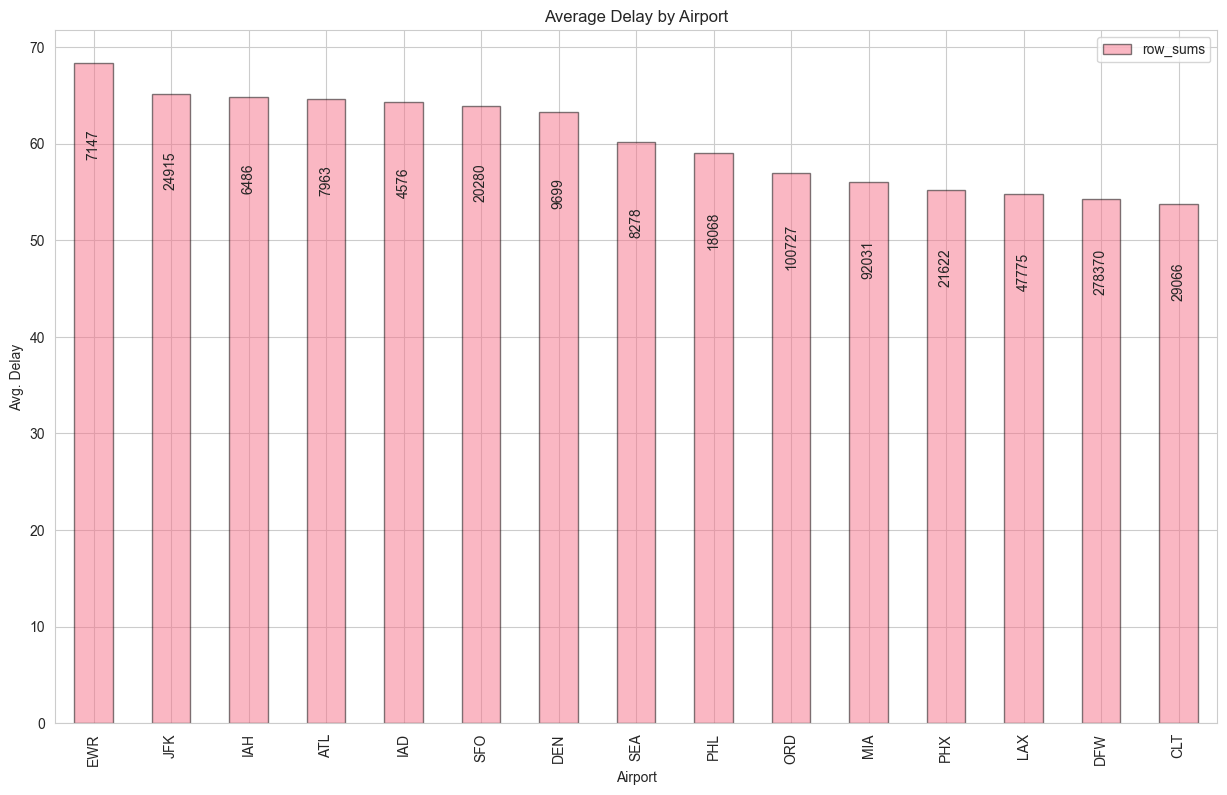

In [363]:
means_by_airport(train_fl_AA_df)

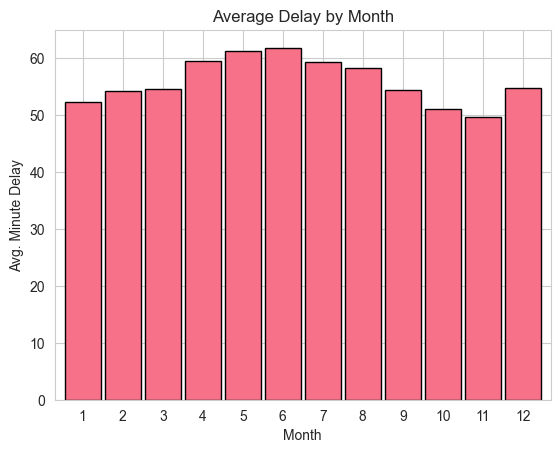

In [388]:
ax = train_fl_AA_df.groupby(train_fl_AA_df.index.month).row_sums.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

In [368]:
origin_row_grp = pd.DataFrame(train_fl_DL_df.groupby('ORIGIN')['row_sums'].mean()).sort_values(by='row_sums', ascending=False)
origin_row_grp

,row_sums
ORIGIN,
EWR,72.931292
IAH,70.373275
ORD,70.358407
DFW,69.281961
PHL,64.949609
JFK,64.809137
MIA,64.457830
IAD,62.503059
DEN,62.226392


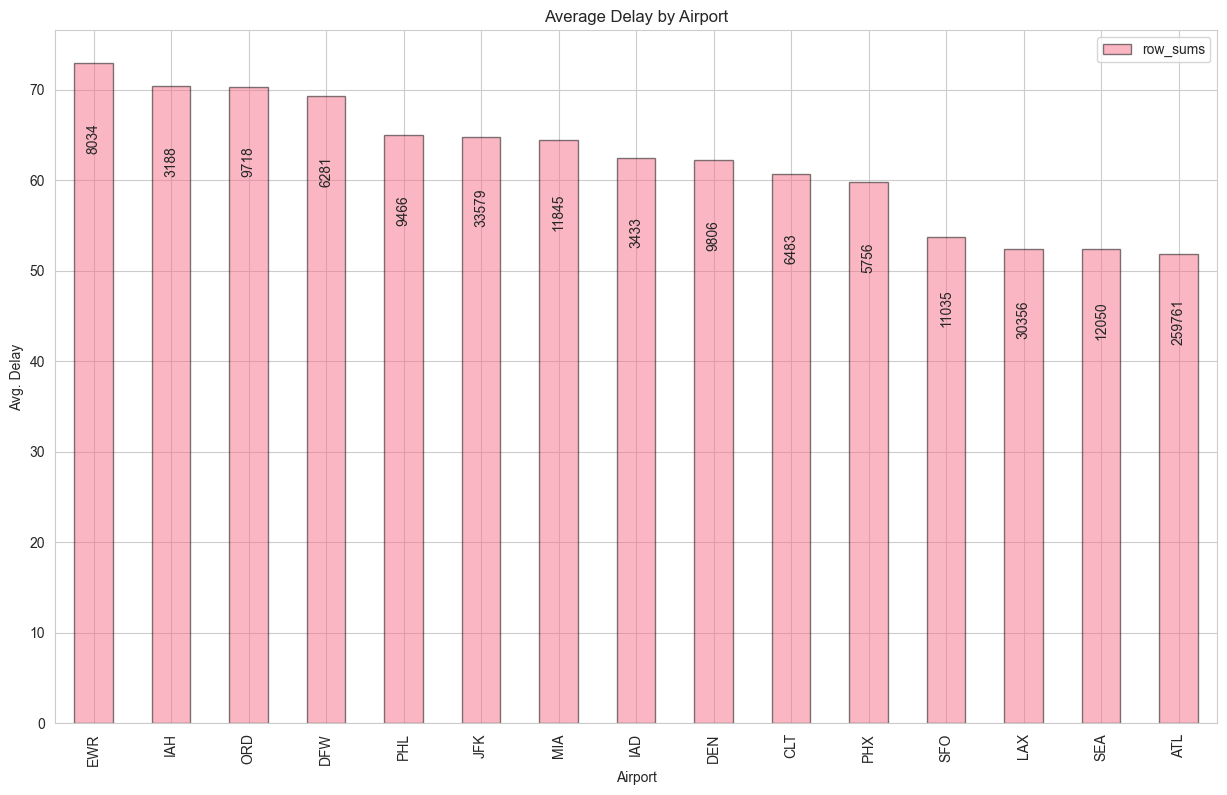

In [369]:
means_by_airport(train_fl_DL_df)

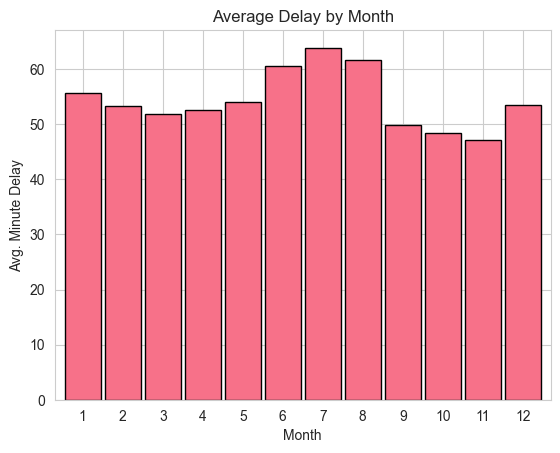

In [389]:
ax = train_fl_DL_df.groupby(train_fl_DL_df.index.month).row_sums.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

In [370]:
origin_row_grp = pd.DataFrame(train_fl_UA_df.groupby('ORIGIN')['row_sums'].mean()).sort_values(by='row_sums', ascending=False)
origin_row_grp

,row_sums
ORIGIN,
DFW,70.329202
ATL,67.682816
PHL,66.880983
CLT,66.854981
ORD,62.386592
IAD,62.015290
MIA,61.508995
PHX,61.375233
SEA,60.695904


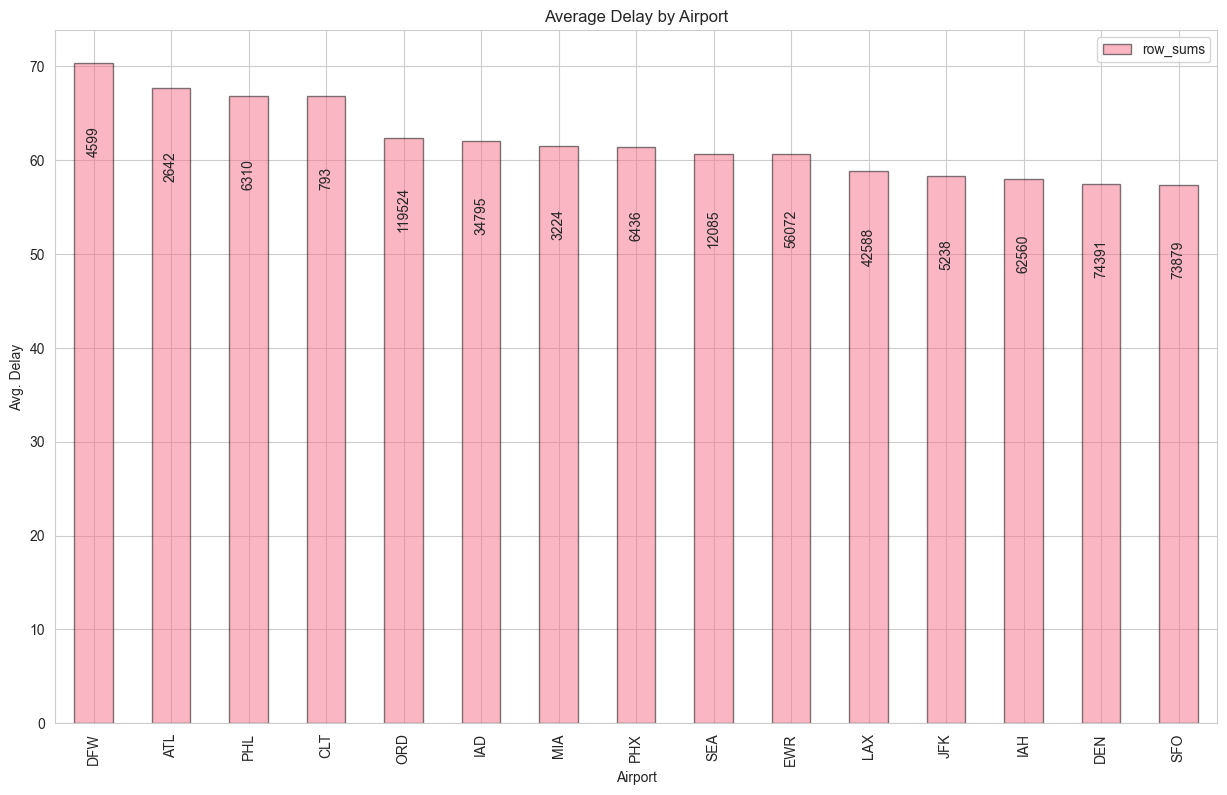

In [371]:
means_by_airport(train_fl_UA_df)

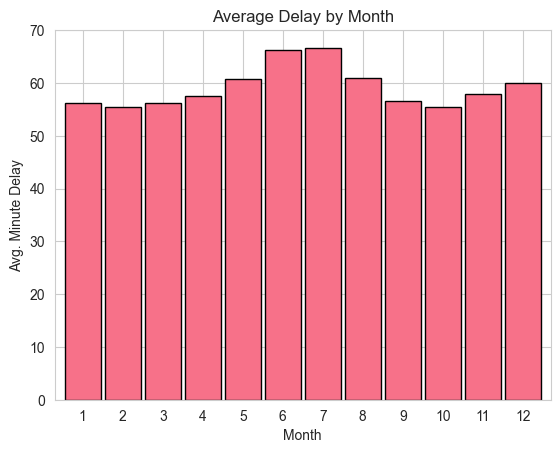

In [391]:
ax = train_fl_UA_df.groupby(train_fl_UA_df.index.month).row_sums.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

In [373]:
origin_row_grp = pd.DataFrame(train_fl_WN_df.groupby('ORIGIN')['row_sums'].mean()).sort_values(by='row_sums', ascending=False)
origin_row_grp

,row_sums
ORIGIN,
EWR,68.082420
PHL,63.933070
SFO,58.424607
IAD,55.838938
CLT,55.783104
ATL,51.850447
DEN,48.707896
LAX,47.243137
SEA,45.649509


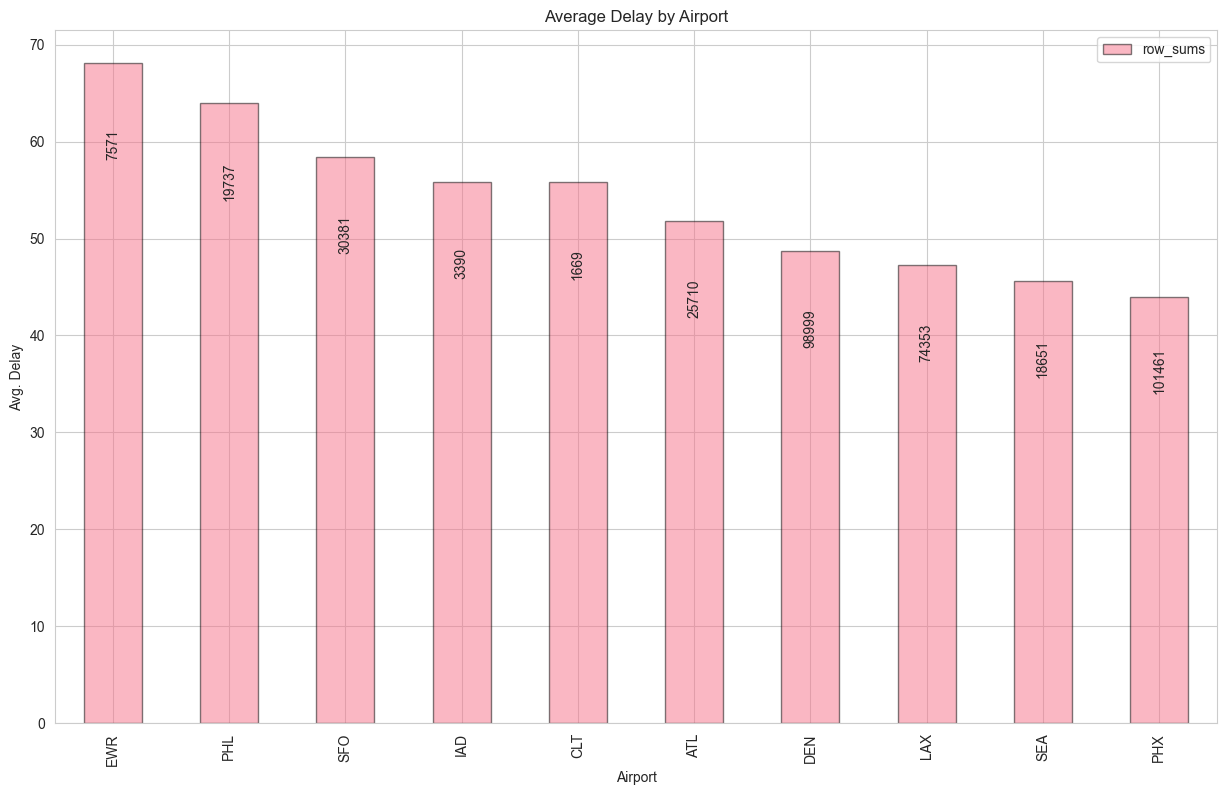

In [374]:
means_by_airport(train_fl_WN_df)

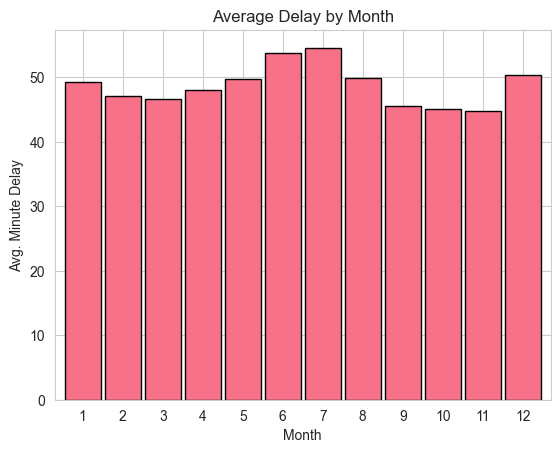

In [392]:
ax = train_fl_WN_df.groupby(train_fl_WN_df.index.month).row_sums.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

In [393]:
 train_fl_WN_df.groupby(train_fl_WN_df.index.month).row_sums.mean()

FL_DATE
1     49.246894
2     47.131870
3     46.620604
4     48.069193
5     49.708213
6     53.786394
7     54.610132
8     49.840238
9     45.634059
10    45.031384
11    44.764754
12    50.430000
Name: row_sums, dtype: float64

In [402]:
all_airline_df.head()

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums,total_delays
FL_DATE,,,,,,,,,,,
2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0,45.0
2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0,162.0
2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0,130.0
2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0,20.0
2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0,49.0


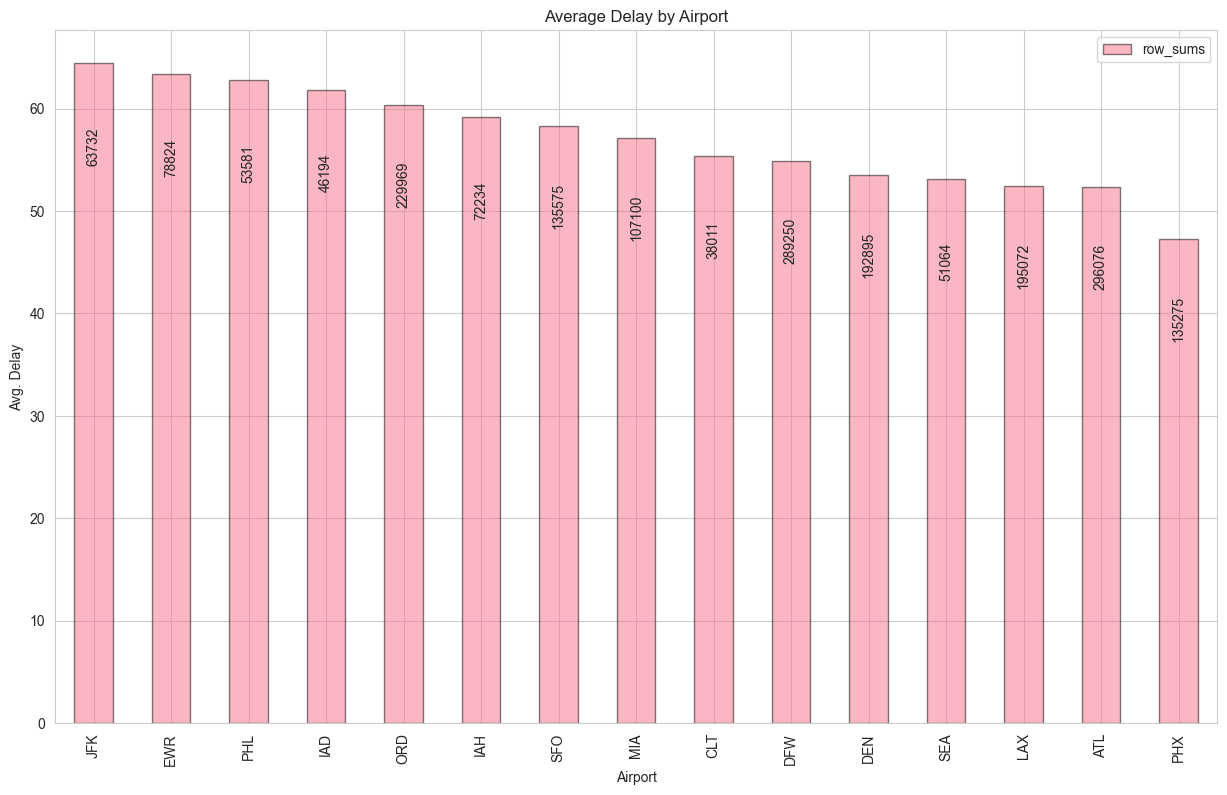

In [395]:
means_by_airport(all_airline_df)

In [396]:
origin_row_grp = pd.DataFrame(all_airline_df.groupby('ORIGIN')['row_sums'].mean()).sort_values(by='row_sums', ascending=False)
origin_row_grp

,row_sums
ORIGIN,
JFK,64.424355
EWR,63.339770
PHL,62.797223
IAD,61.830865
ORD,60.357126
IAH,59.171387
SFO,58.291934
MIA,57.086116
CLT,55.321539


In [397]:
(12+11+14)/3


12.333333333333334

In [412]:
all_airline_df[all_airline_df['ORIGIN']=='SAT']

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums,total_delays
FL_DATE,,,,,,,,,,,


In [405]:
airline_count

WN    1128947
AA     550056
OO     546195
MQ     435670
DL     426036
US     412008
UA     376272
XE     309360
EV     298696
NW     292400
9E     262269
CO     256446
FL     249954
YV     243060
B6     194109
OH     150970
AS     137140
F9      87002
HA      72748
Name: OP_CARRIER, dtype: int64

In [410]:
flights = wrangle.pull_airline_data('XE')
flights['FL_DATE'] = flights['FL_DATE'].astype('datetime64')
# Split the data
train_fl_XE_df = flights.set_index('FL_DATE').loc[:'2016']

/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [411]:
train_fl_XE_df[train_fl_XE_df['ORIGIN']=='SAT']

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,


In [408]:
flights = wrangle.pull_airline_data('MQ')
flights['FL_DATE'] = flights['FL_DATE'].astype('datetime64')
# Split the data
train_fl_MQ_df = flights.set_index('FL_DATE').loc[:'2016']

/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [409]:
train_fl_MQ_df[train_fl_MQ_df['ORIGIN']=='SAT']

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,


In [ ]:
flights = wrangle.pull_airline_data('OO')
flights['FL_DATE'] = flights['FL_DATE'].astype('datetime64')
# Split the data
train_fl_OO_df = flights.set_index('FL_DATE').loc[:'2016'] 

In [407]:
train_fl_OO_df[train_fl_OO_df['ORIGIN']=='SAT']

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,


In [ ]:
flights = wrangle.pull_airline_data('OO')
flights['FL_DATE'] = flights['FL_DATE'].astype('datetime64')
# Split the data
train_fl_OO_df = flights.set_index('FL_DATE').loc[:'2016']